# Exploratory Data Analysis (EDA) of the **CBIS-DDSM** Dataset
In this section, we conduct an exploratory data analysis of the CBIS-DDSM Case and DICOM datasets prepared in prior sections. The purpose of this EDA is four-fold:
1. Discover the relationships among the features.
2. Explore the nature and degree to which features relate to a diagnosis of breast cancer.
3. Identify errors, outliers, and anomalies in the data before the modeling stage.
4. Assess image quality and develop an appropriate image pre-processing approach.

## The Datasets
This analysis will involve the following datasets:
- Case Datasets: Calcification and mass datasets containing patient, abnormality, BI-RADS assessment, image view, breast density, subtlety, and pathology (diagnosis) information.
- DICOM Dataset: Contains image properties, such as image size, shape, bit-depth, aspect ratio, and photometric interpretation.
- DICOM Images: The mammography, ROI masks, and cropped images in DICOM format.

### Case Dataset Dictionary

| #  | Variable             | Type        | Description                                                                                                                  | Validity                                   |
|----|----------------------|-------------|------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------|
| 1  | patient_id           | Nominal     | Unique identifier for each patient.                                                                                          | String of format "P_00000'                 |
| 2  | breast_density       | Discrete    | BI-RADS overall assessment of the volume of attenuating tissues in the   breast.                                             | Integer range [1,4]                        |
| 3  | left_or_right_breast | Nominal     | Which breast was imaged.                                                                                                     | RIGHT or LEFT                              |
| 4  | image_view           | Dichotomous | Either cranialcaudal or mediolateral oblique view.                                                                            | CC or MLO                                  |
| 5  | abnormality_id       | Discrete    | Number of abnormality for the patient.                                                                                       | Integer                                    |
| 6  | abnormality_type     | Dichotomous | BI-RADS category of the abnormality.                                                                                         | calcification or mass                      |
| 7  | calc_type            | Nominal     | Characterization of the type of calcification (where applicable)                                                             | See appendix                               |
| 8  | calc_distribution    | Nominal     | The arrangement of the calcifications inside the breast and, relative to   the probability of malignancy. (where applicable) | See appendix                               |
| 9  | assessment           | Discrete    | Overall BI-RADS assessment of the mammography                                                                                | Integer range [0,6]                        |
| 10 | pathology            | Nominal     | Determination of the malignancy of the case.                                                                                 | MALIGNANT, BENIGN, BENIGN_WITHOUT_CALLBACK |
| 11 | subtlety             | Discrete    | Degree of diagnostic difficulty                                                                                              | Integer range [1,5]                        |
| 12 | fileset              | Nominal     | Indicates training or test set.                                                                                              | train or test                              |
| 13 | mass_shape           | Nominal     | Shape of the mass                                                                                                            | See appendix                               |
| 14 | mass_margins         | Nominal     | Feature that separates the mass from the adjacent breast parenchyma.                                                         | See appendix                               |
| 15 | case_id              | Nominal     | Unique identifier for the case.                                                                                              | String                                     |
| 16 | cancer               | Dichotomous | Indicates whether the cancer is diagnosed.                                                                                   | True or False                              |

### DICOM Dataset Dictionary
| #  | Variable                   | Type        | Description                                                               |
|----|----------------------------|-------------|---------------------------------------------------------------------------|
| 1  | series_uid                 | Nominal     | Unique identifier for a series of images.                                 |
| 2  | filepath                   | Nominal     | The path to the image.                                                    |
| 3  | patient_id                 | Nominal     | Unique identifier for each patient.                                       |
| 4  | side                       | Nominal     | Which breast was imaged.                                                  |
| 5  | image_view                 | Dichotomous | Either cranialcaudal or mediolateral oblique view.                         |
| 6  | photometric_interpretation | Nominal     | Intended interpretation of the pixel data.                                |
| 7  | samples_per_pixel          | Discrete    | Number of samples (planes) in this image.                                 |
| 8  | height                     | Discrete    | Number of rows in the image.                                              |
| 9  | width                      | Discrete    | Number of columns in the image.                                           |
| 10 | size                       | Discrete    | Number of pixels in the image.                                            |
| 11 | aspect_ratio               | Continuous  | Ratio of vertical and horizontal size.                                    |
| 12 | bits                       | Discrete    | Number of bits stored for each pixel sample.                              |
| 13 | smallest_image_pixel       | Discrete    | The minimum actual pixel value encountered in the image.                  |
| 14 | largest_image_pixel        | Discrete    | The maximum actual pixel value encountered in the image.                  |
| 15 | image_pixel_range          | Discrete    | Difference between largest and smallest image pixel.                      |
| 16 | brisque                    | Continuous  | BRISQUE score indicating overall quality of the image.                    |
| 17 | series_description         | Nominal     | Whether the series contains full mammography, ROI mask or cropped images. |


## Approach
### Guiding Questions
> “Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise.” — John Tukey

Here, we'll put forward a set of questions to motivate and guide the discovery process.

**General Questions**
1. Density is considered a potential signal of pathology. How does density relate to BI-RADS assessment and pathology in the CBIS-DDSM dataset?
2. Are abnormalities considered more subtle in dense breasts? 
4. Is breast density determinative of abnormality type, to some degree?
5. Are masses more or less subtle than calcification abnormalities?
7. To what degree are the BI-RADS assessments and pathology in agreement?
8. Does subtlety affect the agreement between BI-RADS assessment and pathology?

**Calcification Cases**
1. Which calcification types are most malignant?
2. How do calcification type and distribution relate to pathology?
3. What does the calcification distribution imply about a diagnosis?
4. To what degree does calcification distribution relate to breast density? 
5. Are certain calcification types more or less subtle than others?
6. To what degree are subtlety and calcification distribution related?

**Mass Cases**
1. How does mass shape relate to pathology?
2. To what degree do mass shape and mass margins affect a BI-RADS assessment? Pathology?
3. What is the relationship between subtlety and mass shape? Mass margins?
4. Do the data support a relationship between breast density and mass shape? mass margins?

**Image Properties**
1. What is the overall quality of the images in the dataset?
2. What is the distribution of the image sizes in terms of height and width?
3. Is bit-depth consistent across all images? Full mammograms? ROI Masks?
4. Is photometric interpretation consistent across all full mammogram images? ROI masks?
5. To what degree are image and ROI mask sizes in agreement?

**Images**
1. To what degree are artifacts (marks and texts) extant in the imaging?
2. How would image brightness and contrast be characterized in the dataset?
3. Is visual intra-class dissimilarity and inter-class similarity a factor among benign calcifications, benign masses, malignant calcifications, and malignant masses?


### Exploratory Data Analysis Plan
The EDA will be conducted in six stages:

| Stage | Dataset        | Analysis     | Focus                                                                                                  |
|-------|----------------|--------------|--------------------------------------------------------------------------------------------------------|
| 1     | Case           | Univariate   | Explore descriptive statistics for each variable in the datasets   separately.                         |
| 2     | Case           | Bivariate    | Analyze pairwise relationships between variables.                                                      |
| 3     | Case           | Multivariate | Evaluate the relationships among multiple variables (more than two) and   patterns.                    |
| 4     | DICOM Metadata | Quality      | Assessment of overall quality of images.                                                               |
| 5     | DICOM Metadata | Structure    | Analyze the image sizes, shape and pixel values.                                                       |
| 6     | DICOM Images   | Visual       | Conduct visual analysis of various abnormalities, densities, and   diagnoses.                          |

**Preliminaries**
The section has the following python package dependencies:
- **Pandas**: Tabular data processing and analysis
- **Numpy**: Numerical processing
- **Matplotlib** and **Seaborn**: Data visualization
- **Scipy**: Statistical analysis
- **StudioAI**: Data visualization and statistical analysis 

In [1]:
import sys
import os
if 'jbook' in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from scipy import stats
import pickle
from IPython.display import display_html, HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

from bcd.data.dataset.case import CaseDataset, CALCIFICATION_DATA, MASS_DATA
from bcd.data.dataset.dicom import DicomDataset

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
sns.set_style('whitegrid')
sns.set_palette("Blues_r")

In [3]:
CASE_FP = "data/preprocessed/cases.csv"
DICOM_FP = "data/staged/dicom.csv"

In [4]:
cases = CaseDataset(filepath=CASE_FP)
calc = CaseDataset(df=cases.get_calc_data())
mass = CaseDataset(df=cases.get_mass_data())

## Case Data Univariate Analysis
Let's get an overall sense of the data.

In [5]:
summary = cases.summary()
summary

,Summary
Patients,1566
Cases,3566
Calcification Cases,1872
Calcification Cases - Benign,1199
Calcification Cases - Malignant,673
Mass Cases,1694
Mass Cases - Benign,910
Mass Cases - Malignant,784


In [6]:
st = summary.T
pct_calc = round(st['Calcification Cases'] / st['Cases'] * 100,2).values[0]
pct_mass = round(st['Mass Cases'] / st['Cases'] * 100,2).values[0]
pct_calc_mal = round(st['Calcification Cases - Malignant'] / st['Calcification Cases'] * 100,2).values[0]
pct_calc_bn = round(st['Calcification Cases - Benign'] / st['Calcification Cases'] * 100,2).values[0]
pct_mass_mal = round(st['Mass Cases - Malignant'] / st['Mass Cases'] * 100,2).values[0]
pct_mass_bn = round(st['Mass Cases - Benign'] / st['Mass Cases'] * 100,2).values[0]
cases_per_patient = round(st['Cases'] / st['Patients'],2).values[0]
msg = f"Key Observations\n"
msg += f"1.\tThe number of patients, {st['Patients'].values[0]} comports with the TCIA data description.\n"
msg += f"2.\tWe have {st['Cases'].values[0]} cases, {pct_calc}% are calcification cases and {pct_mass}% are mass cases.\n"
msg += f"3.\tOf the calcification cases, {pct_calc_bn}% are benign, {pct_calc_mal} or malignant.\n"
msg += f"4.\tOf the mass cases, {pct_mass_bn}% are benign, {pct_mass_mal} or malignant.\n"
msg += f"5\tOn average we have approximately {cases_per_patient} cases per patient."
print(msg)

Key Observations
1.	The number of patients, 1566 comports with the TCIA data description.
2.	We have 3566 cases, 52.5% are calcification cases and 47.5% are mass cases.
3.	Of the calcification cases, 64.05% are benign, 35.95 or malignant.
4.	Of the mass cases, 53.72% are benign, 46.28 or malignant.
5	On average we have approximately 2.28 cases per patient.



Let's take a look at the calcification and mass data.

In [7]:
cases.get_calc_data().sample(5)
cases.get_mass_data().sample(5)

,case_id,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,calc_type,calc_distribution,assessment,pathology,subtlety,fileset,cancer
1210,P_01563_LEFT_calcification_MLO_2,P_01563,3,LEFT,MLO,2,ROUND_AND_REGULAR-LUCENT_CENTERED,SEGMENTAL,2,BENIGN_WITHOUT_CALLBACK,3,train,False
1668,P_00753_LEFT_calcification_MLO_1,P_00753,2,LEFT,MLO,1,AMORPHOUS,CLUSTERED,3,BENIGN,3,test,False
783,P_01002_LEFT_calcification_CC_1,P_01002,3,LEFT,CC,1,FINE_LINEAR_BRANCHING,REGIONAL,5,MALIGNANT,5,train,True
139,P_00179_LEFT_calcification_MLO_1,P_00179,3,LEFT,MLO,1,PLEOMORPHIC,CLUSTERED,4,BENIGN,2,train,False
1418,P_01838_RIGHT_calcification_CC_2,P_01838,1,RIGHT,CC,2,LUCENT_CENTERED,SEGMENTAL,2,BENIGN_WITHOUT_CALLBACK,5,train,False


,case_id,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,mass_shape,mass_margins,assessment,pathology,subtlety,fileset,cancer
2687,P_01175_LEFT_mass_MLO_1,P_01175,1,LEFT,MLO,1,OVAL,CIRCUMSCRIBED,3,BENIGN_WITHOUT_CALLBACK,5,train,False
2727,P_01230_LEFT_mass_MLO_1,P_01230,1,LEFT,MLO,1,IRREGULAR,ILL_DEFINED,4,MALIGNANT,2,train,True
2176,P_00430_LEFT_mass_MLO_1,P_00430,3,LEFT,MLO,1,LOBULATED,CIRCUMSCRIBED,4,BENIGN,4,train,False
3035,P_01669_LEFT_mass_CC_1,P_01669,4,LEFT,CC,1,IRREGULAR,SPICULATED,5,MALIGNANT,5,train,True
2861,P_01417_RIGHT_mass_MLO_1,P_01417,4,RIGHT,MLO,1,ARCHITECTURAL_DISTORTION,SPICULATED,4,BENIGN,4,train,False


Our univariate analysis will cover:
- Breast Density
- Left or Right Breast
- Image View
- Abnormality Id
- Abnormality Type
- Subtlety
- BI-RADS Assessment
- Calcification Type
- Calcification Distribution
- Mass Shape
- Mass Margins
- Pathology
- Cancer (Target)

And we begin...

### Breast Density
Radiologists classify breast density using a 4-level density scale {cite}BreastImagingReporting:

1. Almost entirely fatty
2. Scattered areas of fibroglandular density
3. Heterogeneously dense
4. Extremely dense

According to the American College of Radiology™️, breast density in the U.S.:

- 10% of women have almost entirely fatty breasts,
- 10% have extremely dense breasts,
- 40% of women have scattered areas of fibroglandular density
- 40% have heterogeneously dense breasts

{figure}
:name: density_ref
Breast Density Categories {cite}`WHATAREDENSE`

In [8]:
df_cases = cases.as_df()
d1 = np.repeat([1], int(df_cases.shape[0]*.1))
d2 = np.repeat([2], int(df_cases.shape[0]*.4))
d3 = np.repeat([3], int(df_cases.shape[0]*.4))
d4 = np.repeat([4], int(df_cases.shape[0]*.1))
d = np.append(arr=d1,values=d2)
d = np.append(arr=d,values=d3)
d = np.append(arr=d,values=d4)
d = {"Breast Density": d, "Sample": "U.S."}
usd = pd.DataFrame(data=d)
density = df_cases['breast_density'].to_frame()
density.rename(columns={'breast_density': 'Breast Density'}, inplace=True)
density['Sample'] = 'CBIS-DDSM'
density = pd.concat([density, usd], axis=0).reset_index()

The following exhibits the counts by breast density category in the CBIS-DDSM dataset vis-a-vis a sample from the US of the same size.

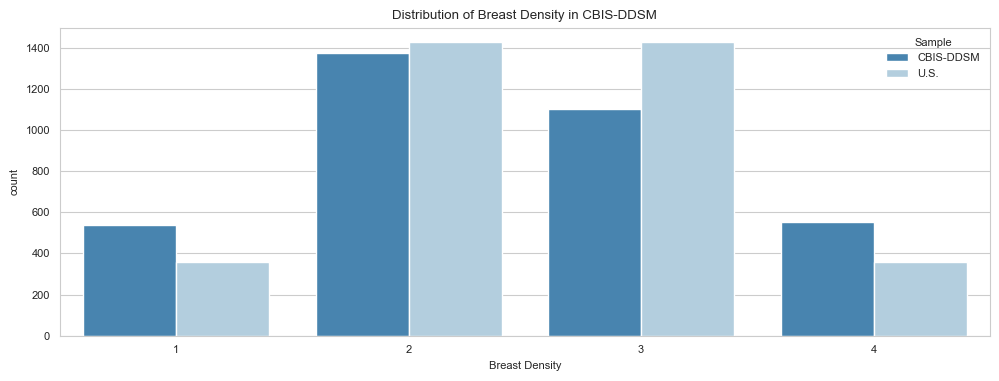

In [9]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(data=density,x='Breast Density', hue="Sample", ax=ax, title ="Distribution of Breast Density in CBIS-DDSM", dodge=True)

Interesting. The distribution of breast density in the dataset models pretty closely the distribution of breast density in the United States. 

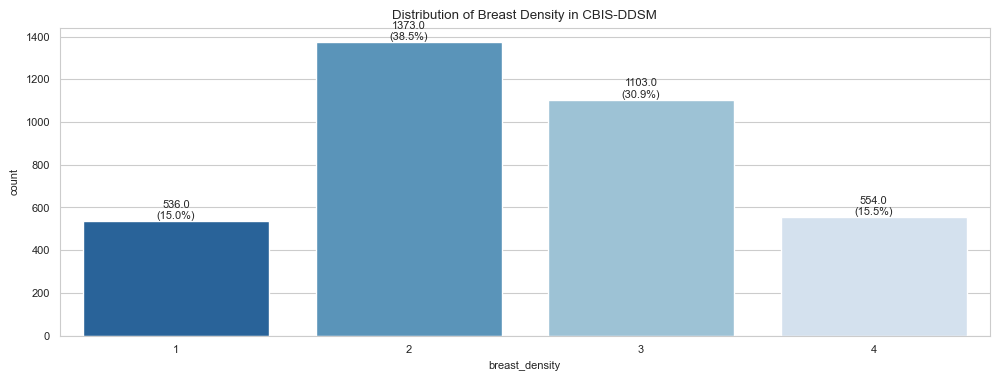

In [10]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(x='breast_density', ax=ax, title ="Distribution of Breast Density in CBIS-DDSM", plot_counts=True)

The distribution of breast density in the CBIS-DDSM approximates a normal distribution, to the extent four points make a distribution. 

### Left or Right Side

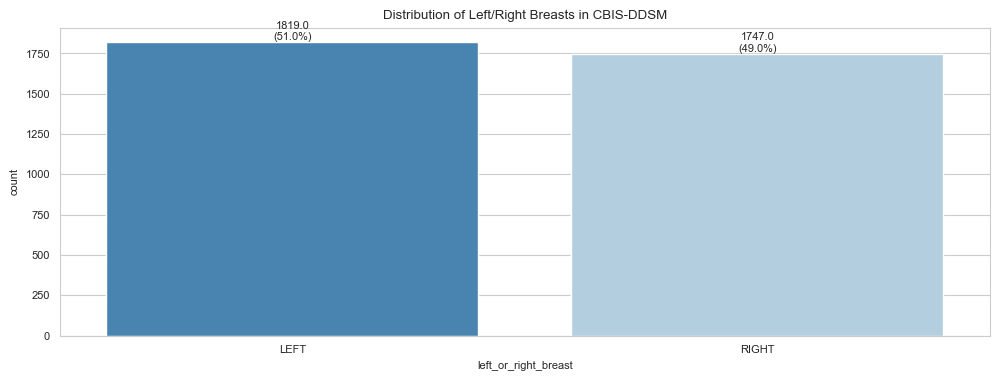

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(x='left_or_right_breast', ax=ax, title ="Distribution of Left/Right Breasts in CBIS-DDSM", plot_counts=True)

The dataset is approximately balanced with respect to left or right breasts.

### Image View
CBIS-DDSM contains digital mammography images in two different views: cranial caudal (CC) and mediolateral oblique (MLO). The CC view is taken from above the breast; whereas, the MLO view is taken from the center of the breast outward. 

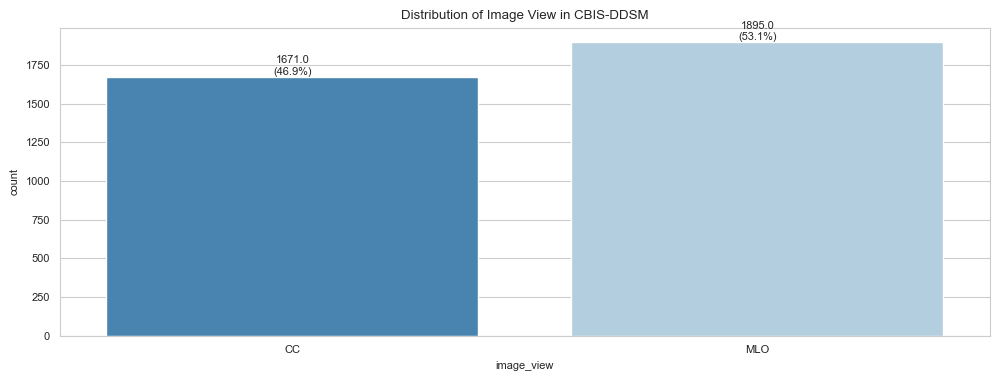

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(x='image_view', ax=ax, title ="Distribution of Image View in CBIS-DDSM", plot_counts=True)

Slightly greater number of MLO views; however, the dataset has a reasonable balance of image views.

### Abnormality Id
The abnormality id is a sequence number assigned to each abnormality for a patient. 

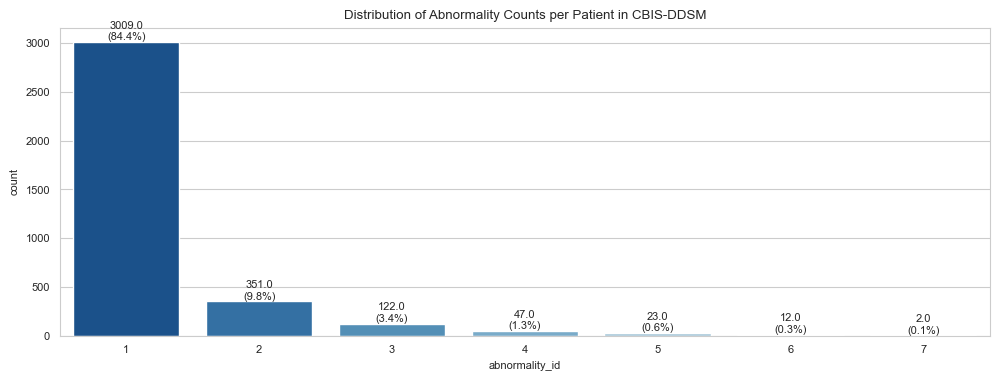

In [13]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(x='abnormality_id', ax=ax, title ="Distribution of Abnormality Counts per Patient in CBIS-DDSM", plot_counts=True)

The vast majority of patients present with a single abnormality; although, a considerable number have two or more.

### Abnormality Type
CBIS-DDSM contains two abnormality types: calcification and mass. 

Calcifications, common on mammograms, especially after age 50, are calcium deposits within the breast tissue. Typically benign, calcifications show up as either macrocalcifications or microcalcifications. Macrocalcifications appear as large white dots or dashes which are almost always noncancerous, requiring no further testing or follow-up. Microcalcifications show up as fine, white specks, similar to grains of salt. Usually noncancerous, but certain patterns can be an early sign of cancer.

Masses are also common, particularly among women of reproductive age. For the 25% of women affected by breast disease in their lifetime, the vast majority will present initially with a new breast mass in the primary care setting. Breast masses have a wide range of causes, from physiological adenosis to highly aggressive malignancy.  

As shown below, the dataset contains a balance of calcification and mass cases.

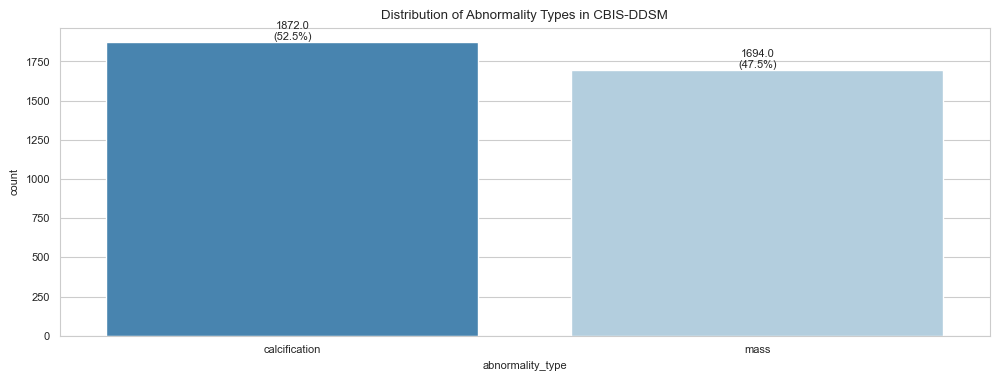

In [14]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(x='abnormality_type', ax=ax, title ="Distribution of Abnormality Types in CBIS-DDSM", plot_counts=True)

### Subtlety
Subtlety is a measure of the degree to which a particular case is difficult to diagnose. Values range from 1 (highly subtle) to 5 (obvious).

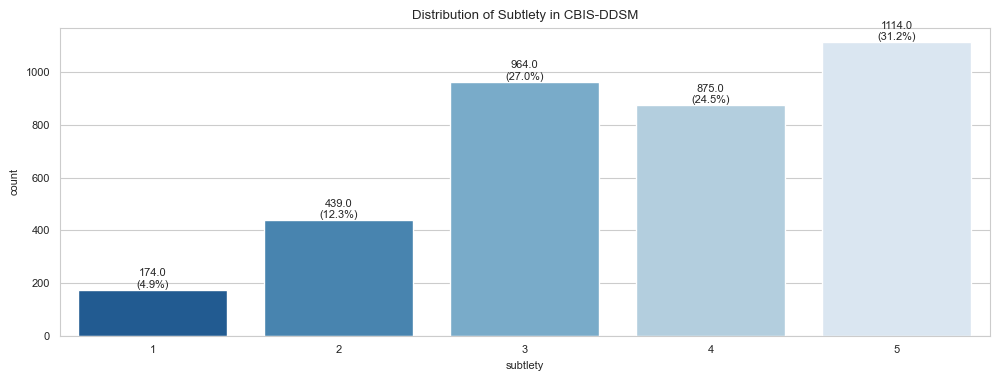

In [15]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(x='subtlety', ax=ax, title ="Distribution of Subtlety in CBIS-DDSM", plot_counts=True)

CBIS-DDSM cases cover the range from highly subtle to obvious, trending towards a greater number of cases considered moderately subtle to obvious.

### BI-RADS Assessment
A BI-RADS assessment an overall assessment of the imaging and has size categories:

| Category | Definition                                                                                                                                                         |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 0        | Means the findings are unclear. The radiologist will need more images to   determine a score                                                                       |
| 1        | Means the findings are negative and the breast tissue appears normal. No   masses, calcifications, asymmetry or other abnormalities have been   found.             |
| 2        | Means the findings are benign, which is also negative for cancer. While a   mass, calcification or other abnormality may have been detected, it’s not   cancerous. |
| 3        | Means the findings are probably benign. While a mass, calcification or   other abnormality may have been found, it’s most likely not cancerous.                    |
| 4        | Means cancer is suspected. There are four subcategories that relate to   the probability of a malignancy: 4A (2-10%) 4B (10-50%) 4C (50-95%)                       |
| 5        | Means cancer is highly suspected. Findings have a 95% chance or higher of   being cancerous.                                                                       |
| 6        | Cancer was previously diagnosed using a biopsy.                                                                                                                    |

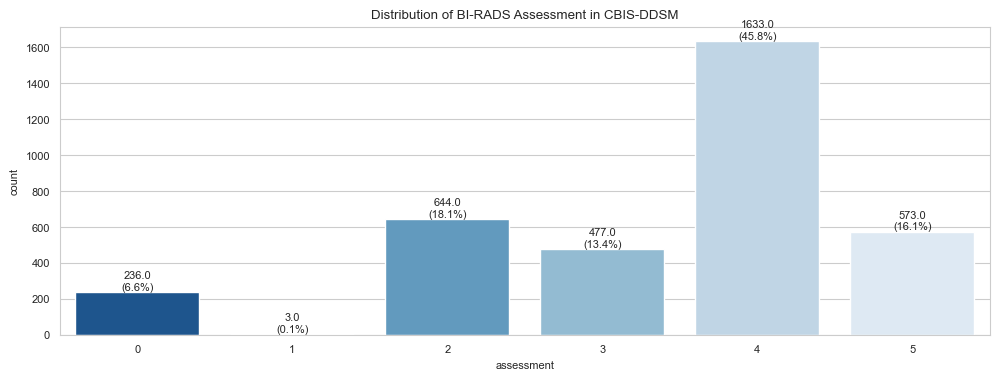

In [16]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(x='assessment', ax=ax, title ="Distribution of BI-RADS Assessment in CBIS-DDSM", plot_counts=True)

### Calcification Type
Calcification type describes the morphology of a case and is the most important factor in the differentiation between benign and malignant cases. There are over 40 different categories of calc_type in the dataset; yet, the some of the main categories are:

| #  | Morphology            |                                                                                                                | Assessment     |
|----|-----------------------|----------------------------------------------------------------------------------------------------------------|----------------|
| 1  | Amorphous             | Indistinct calcifications, without clearly defined shape, small and/or   hazy in appearance                    | BI-RADS 4B     |
| 2  | Coarse Heterogeneous  | Irregular, conspicuous calcifications, typically larger than 0.5 mm.                                           | BI-RADS 3      |
| 3  | Dystrophic            | Irregular, 'lava-shaped', larger than 0.5 mm, which develop 3-5 years   after treatment in about 30% of women. | BI-RADS 1 or 2 |
| 4  | Eggshell              | Very thin benign calcifications that appear as calcium                                                         | BI-RADS 1 or 2 |
| 5  | Fine Linear Branching | Thin linear or curvilinear irregular.                                                                          | BI-RADS 4B     |
| 6  | Large Rod-like        | Benign calcifications that form continuous rods that may occassionally be   branching.                         | BI-RADS 1 or 2 |
| 7  | Lucent-Centered       | Round or oval calcifications, typically result of fat necrosis, or   calcified debris in ducts                 | BI-RADS 1 or 2 |
| 8  | Milk of Calcium       | Benign sedimented calcifications in macro or microcysts.                                                       | BI-RADS 1 or 2 |
| 9  | Pleomorphic           | Calcifications varying in size and shape, more conspicuous than amorphic   calcifications.                     | BI-RADS 4B     |
| 10 | Punctate              | Round calcifications 0.5-1 mm in size.                                                                         | BI-RADS 2,3,4  |
| 11 | Skin                  | Skin calcifications, usually lucent-centered deposits                                                          | BI-RADS 1 or 2 |
| 12 | Vascular              | Linear or form parallel tracks, usually associated with blood vessels.                                         | BI-RADS 1 or 2 |



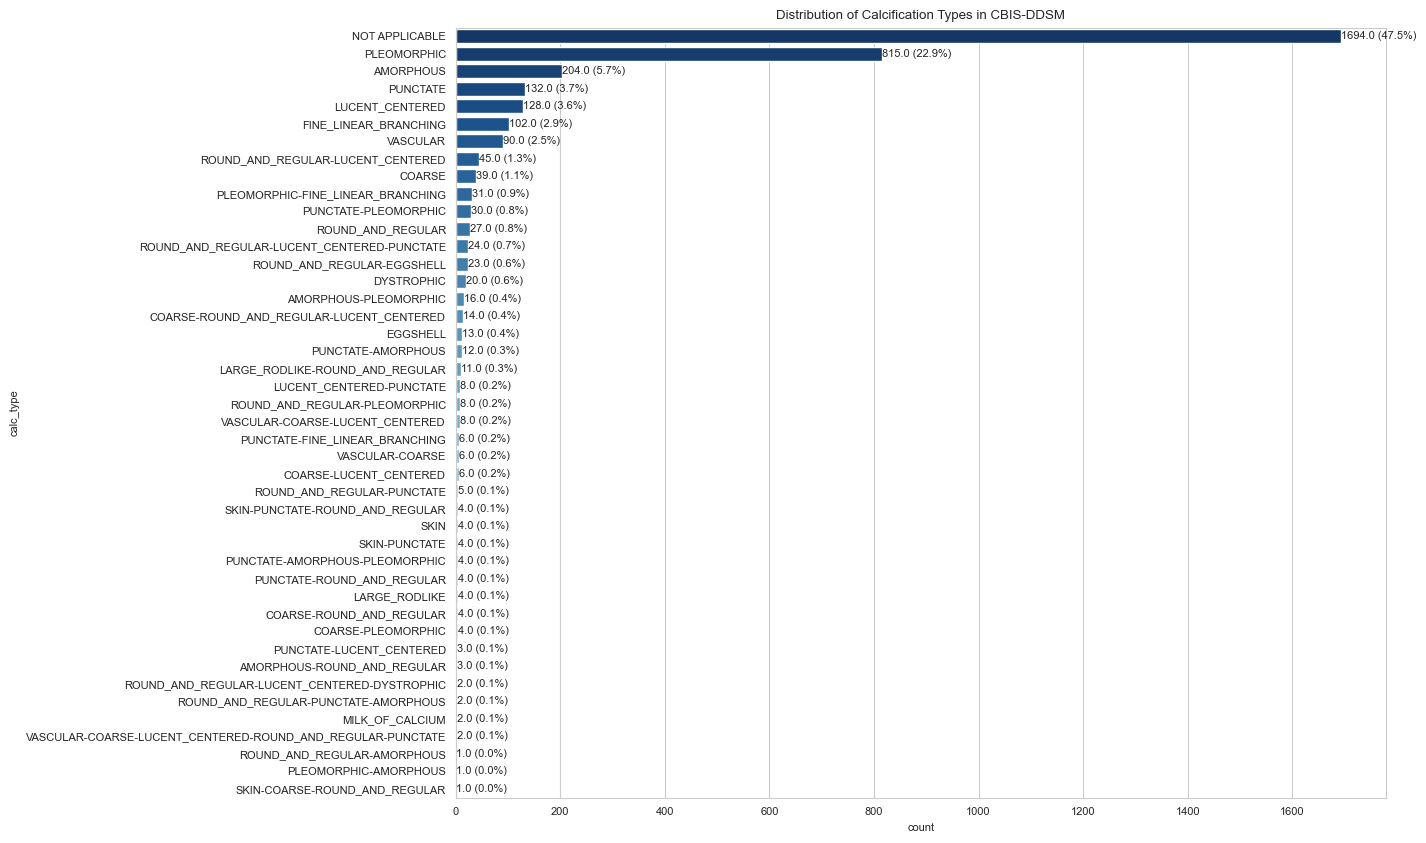

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
cases.plot.countplot(y='calc_type', ax=ax, title ="Distribution of Calcification Types in CBIS-DDSM", plot_counts=True, order_by_count=True)

The vast majority of calcification types are pleomorphic, amorphous, and lucent-centered.

### Calcification Distribution
Calcification distribution refers to the arrangement of the calcifications inside the breast. BI-RADS describes the following categories of calcification distribution:
1. Diffuse or Scattered: Calcifications throughout the whole breast.
2. Regional: Scattered in a larger volume (> 2 cc) of breast tissue and not in the expected ductal distribution.
3. Clustered: Groups of at least 5 calcifications in a small volume of tissue
4. Segmental: Calcium deposits appear in ducts or branches of a segment or lobe.

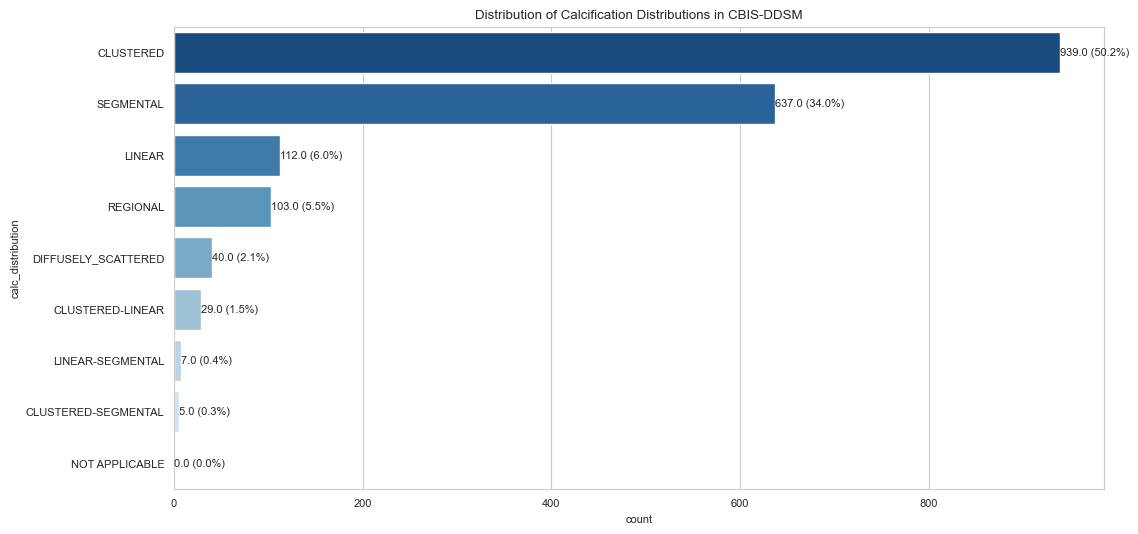

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
calc.plot.countplot(y='calc_distribution', ax=ax, title ="Distribution of Calcification Distributions in CBIS-DDSM", plot_counts=True, order_by_count=True)

### Mass Shape
The BI-RADS lexicon defines four mass shapes:
1. Round
2. Oval
3. Lobulated
4. Irregular

The following mass shapes are represented in the CBIS-DDSM.

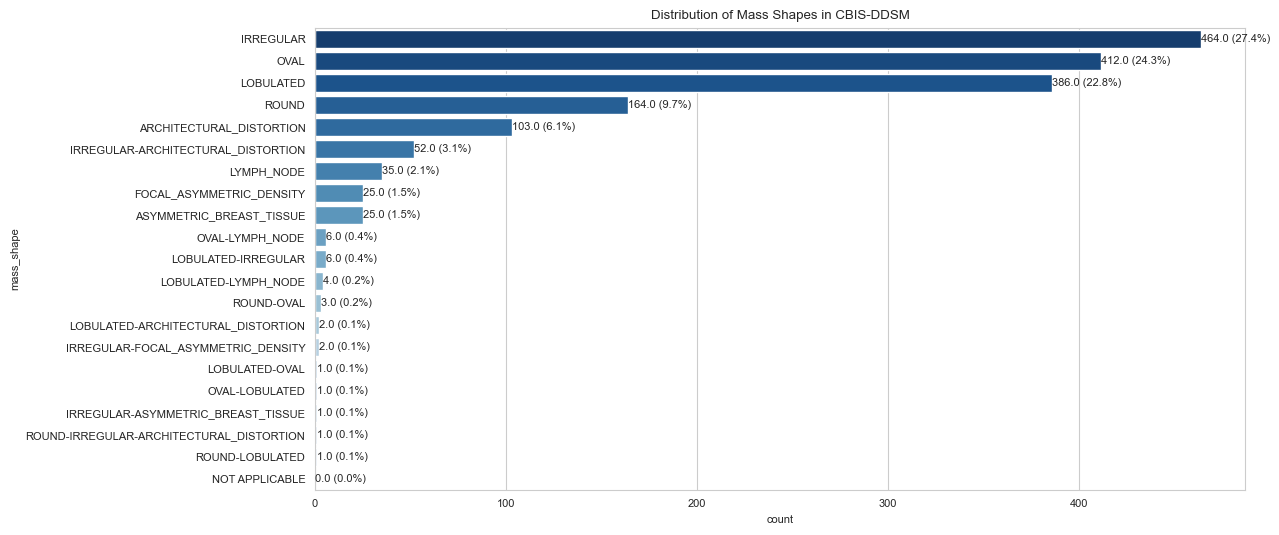

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
mass.plot.countplot(y='mass_shape', ax=ax, title ="Distribution of Mass Shapes in CBIS-DDSM", plot_counts=True, order_by_count=True)

Most mass cases have lobulated, irregular, oval or round shapes.

### Mass Margins
A feature that separates the mass from the adjacent breast parenchyma. Mass margins can be:
1. Circumscribed: Low probability of malignancy.
2. Obscured: Undetermined likelihood of malignancy.
3. Spiculated: Higher likelihood of malignancy.
4. Microlobulated: Suspicious for breast carcinoma: 
5. Ill-Defined: Also called 'indistinct'. Generally suspicious of malignancy.     


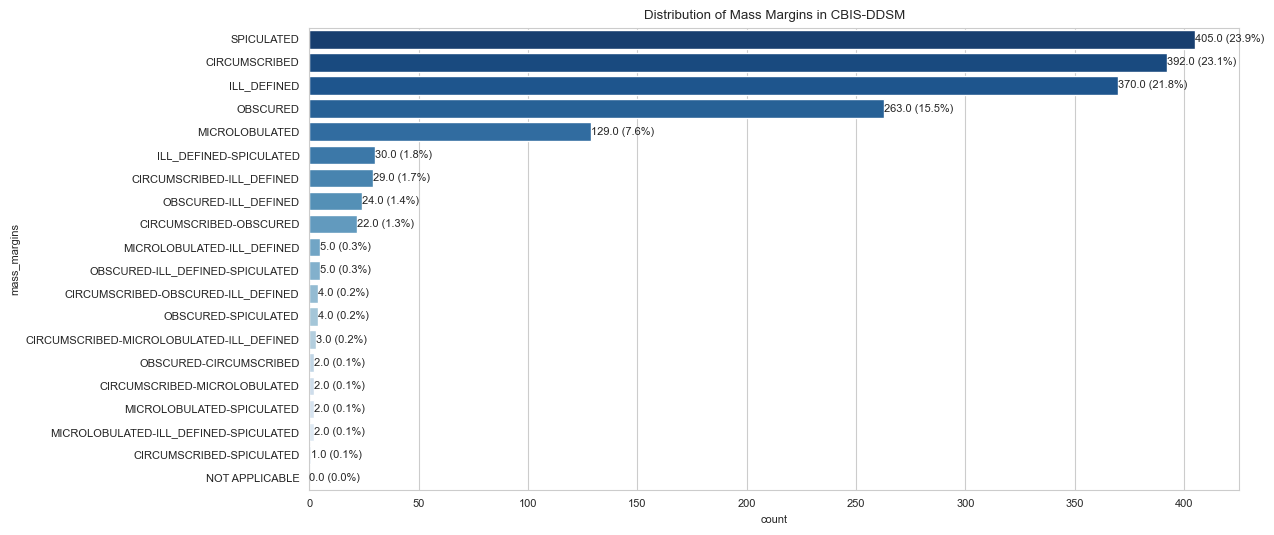

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
mass.plot.countplot(y='mass_margins', ax=ax, title ="Distribution of Mass Margins in CBIS-DDSM", plot_counts=True, order_by_count=True)

Circumscribed, ill-defined, obscured and microlobulated mass margins are most frequently observed in this dataset.

### Pathology
The dataset distinguishes three outcomes: malignant, benign, and benign without callback. The latter indicates that the region may be suspicious, and should be monitored, but no further investigation is required.

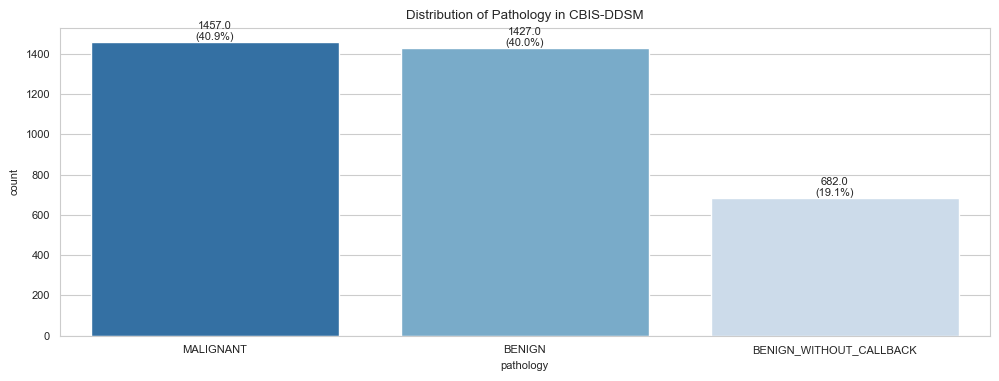

In [21]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(x='pathology', ax=ax, title ="Distribution of Pathology in CBIS-DDSM", plot_counts=True, order_by_count=True)

The majority of cases are benign; although, benign without callback represents a considerable proportion of the cases. 

### Cancer
Here, we collapse BENIGN and BENIGN_WITHOUT_CALLBACK into a single category.

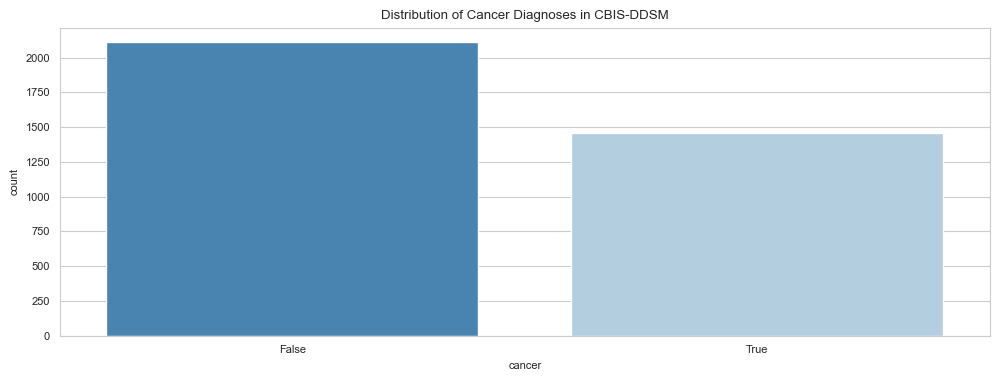

In [22]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(x='cancer', ax=ax, title ="Distribution of Cancer Diagnoses in CBIS-DDSM")

### Summary CBIS-DDSM Case Univariate Analysis
Several observations can be made at this stage.
1. The CBIS-DDSM is well-balanced with respect to breast density, morphology, subtlety, BI-RADS assessment, and pathology. 
2. Over 40 calcification types are represented; however, the majority of cases fall into one of five types.
3. Similarly, there are nearly 20 categories of mass margins; yet, but most cases fall into one of the five major classes:
   1. Spiculated
   2. Circumscribed
   3. Obscured
   4. Ill-Defined

Next up, bivariate analysis. 

## Case Data Bivariate Analysis
This bivariate analysis will comprise a dependency analysis, and an inter-dependence analysis.  The former assesses the degree to which a cancer diagnosis depends upon the values of the explanatory variables, such as breast density, type and distribution of calcifications, and the shape and margins of masses. The inter-dependence analysis explores the association between two independent variables.

In [23]:
df = cases.as_df(categorize_ordinals=True)

### Bivariate Target Variable Association Analysis

#### Cancer Diagnosis by Breast Density

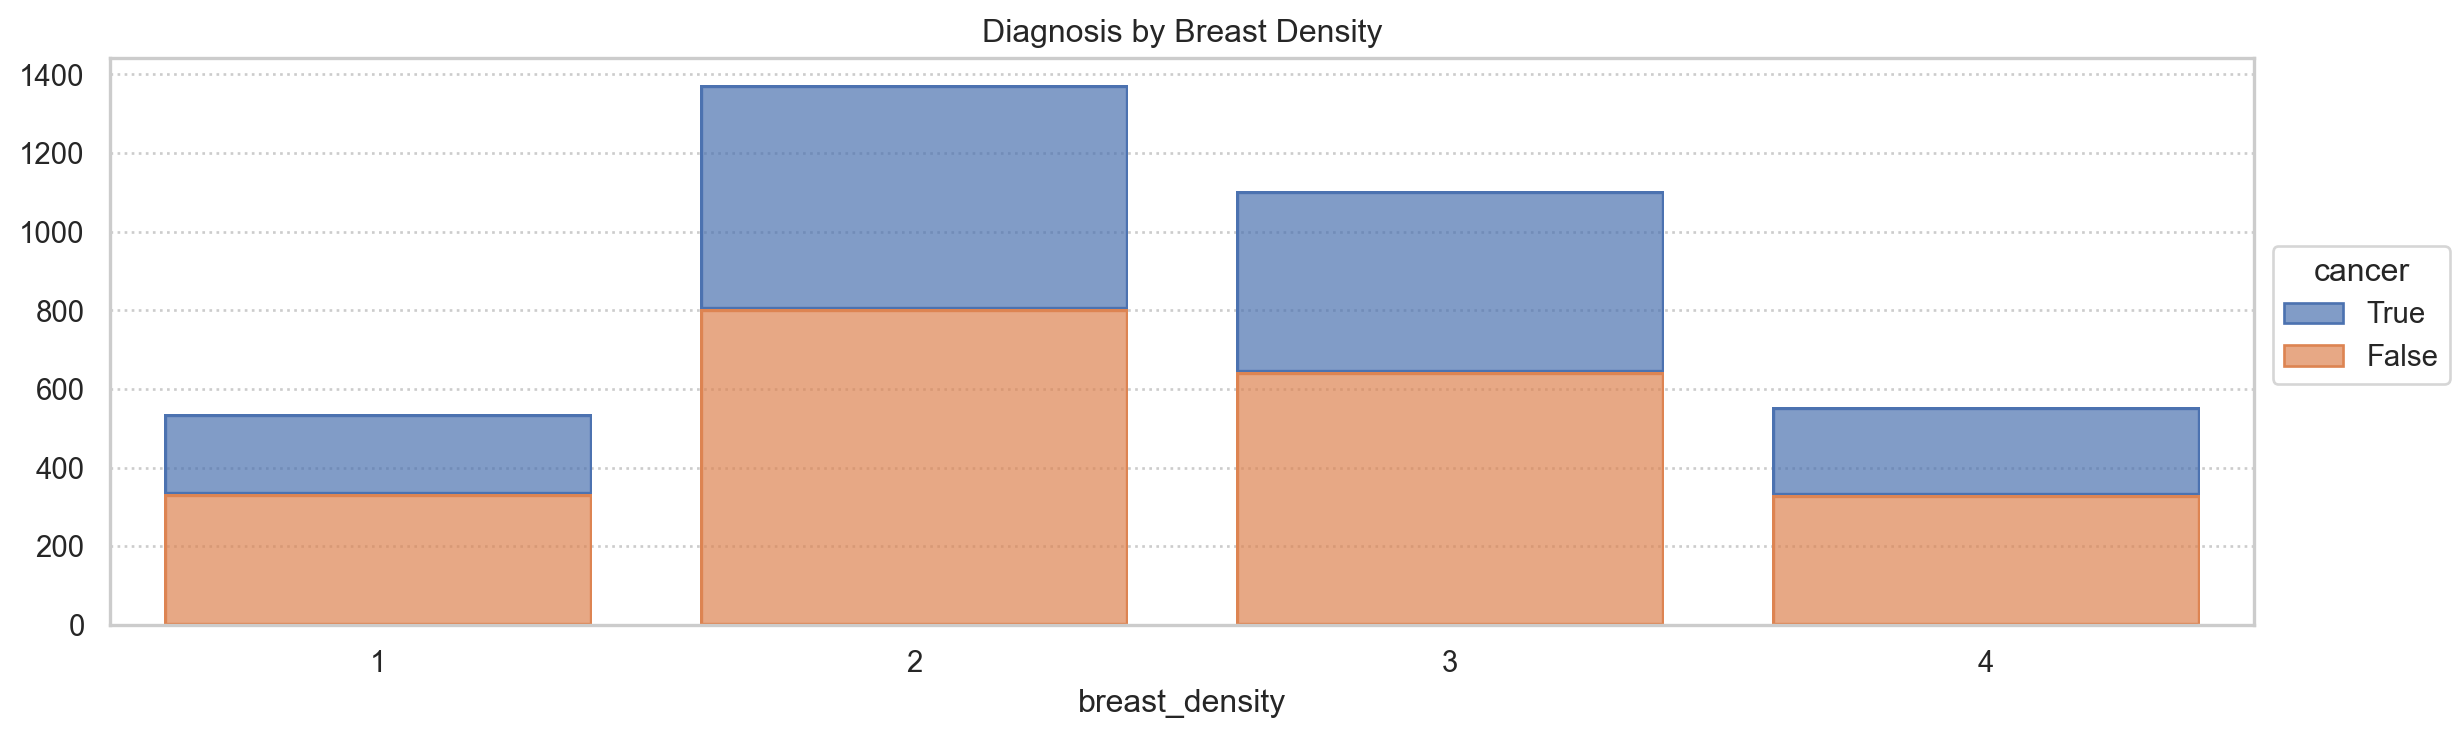

In [24]:
sns.objects.Plot(df, x='breast_density', color='cancer').add(so.Bar(), so.Count(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Breast Density").layout(size=(12,4), engine='tight')

It's rather difficult to assess the degree to which breast density related to a diagnosis. Let's plot the relative proportions.

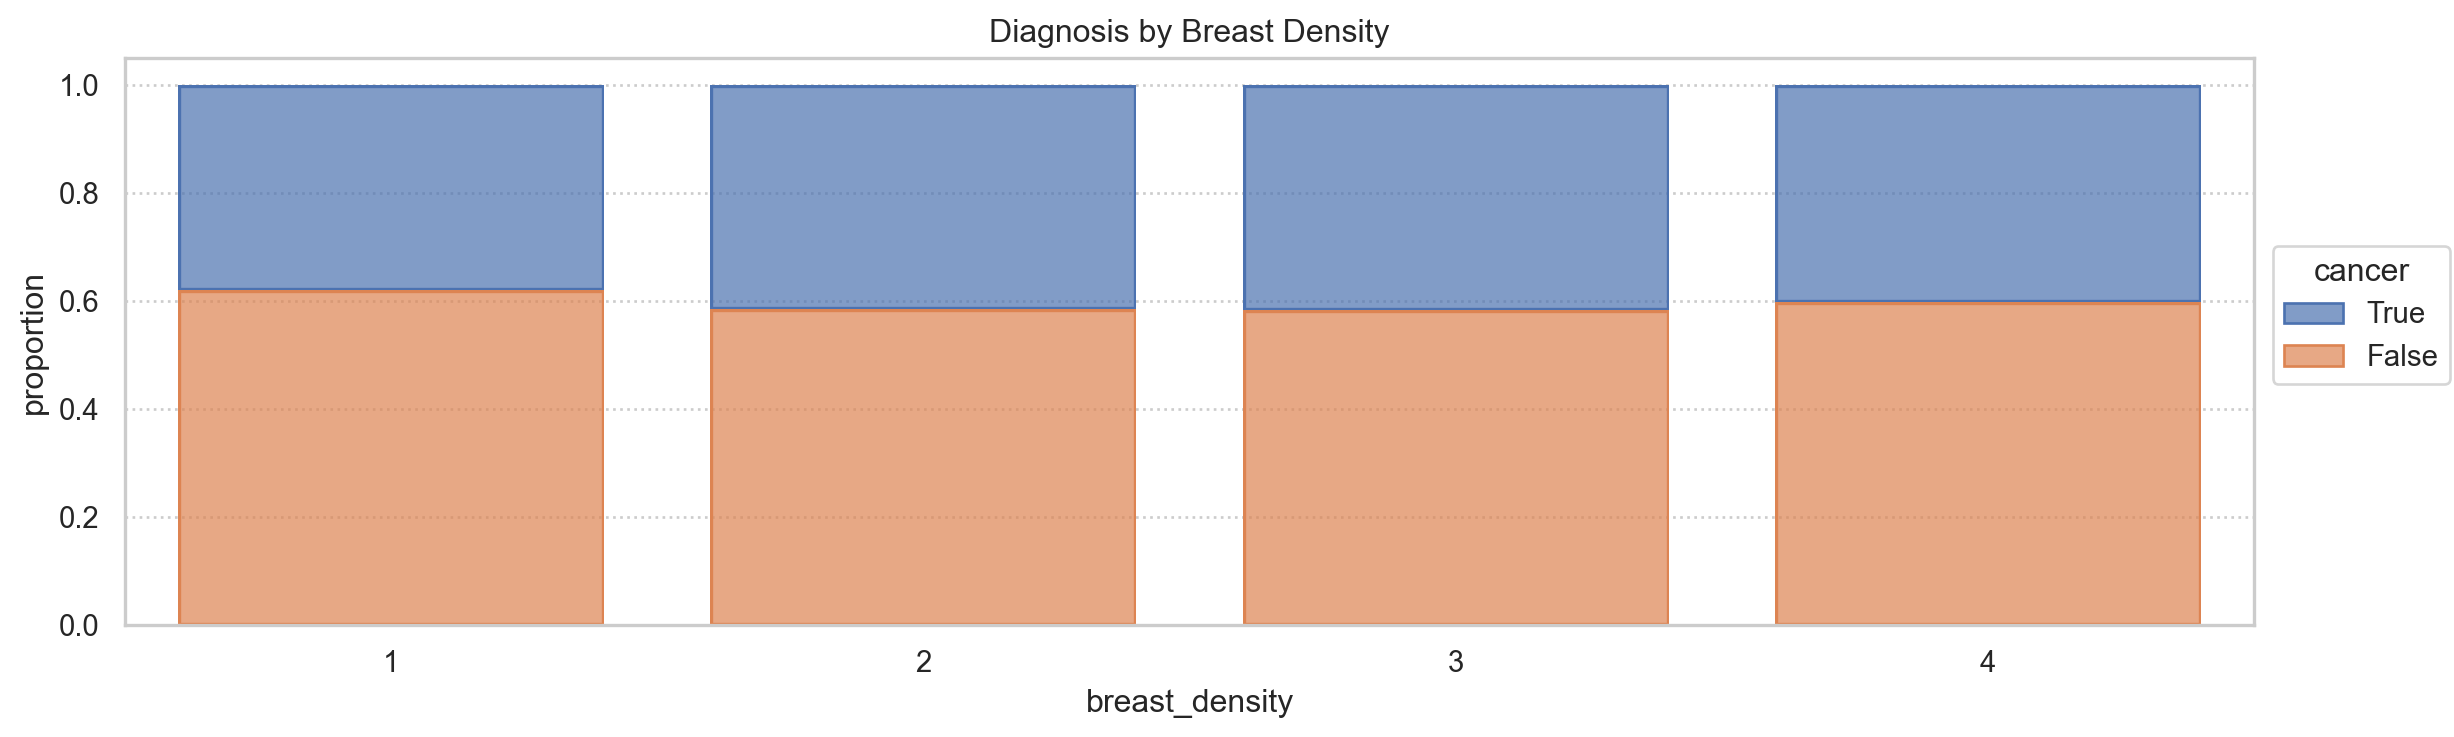

In [25]:
prop = df[['breast_density', 'cancer']].groupby(by=['breast_density']).value_counts(normalize=True).to_frame().reset_index().sort_values(by=['breast_density','cancer'])
sns.objects.Plot(prop, x='breast_density', y='proportion', color='cancer').add(so.Bar(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Breast Density").layout(size=(12,4), engine='tight')

Breast density is considered a risk factor for breast cancer, as women with dense breasts have a higher risk of breast cancer than women with fatty breasts {cite}`DenseBreastsAnswers2018`. Notwithstanding, the CBIS-DDSM data don't reveal a strong relationship between breast density and diagnosis. Let's see if a test of association supports our inference.

In [26]:
kt = cases.stats.kendallstau(a='breast_density', b='cancer')
print(kt)



                          KendallsTau                           
                            Name | Kendall's τ
                           Value | 0.011138411035362646
                          Pvalue | 0.5382894688881223
                           Alpha | 0.05
                               A | breast_density
                               B | cancer
                               N | 3566
                        Strength | Weak




The Kendall's Tau test measuring the association between breast density and malignancy indicated a non-significant association of weak effect, ($\phi_\tau$ = 0.01, p = 0.54).

#### Cancer Diagnosis by Breast
A 2022 study published in Nature {cite}`abdouLeftSidedBreast2022` suggests that breast cancer is slightly more prevalent on the left side of the body than it is on the right. Do the CBIS-DDSM data support this finding?

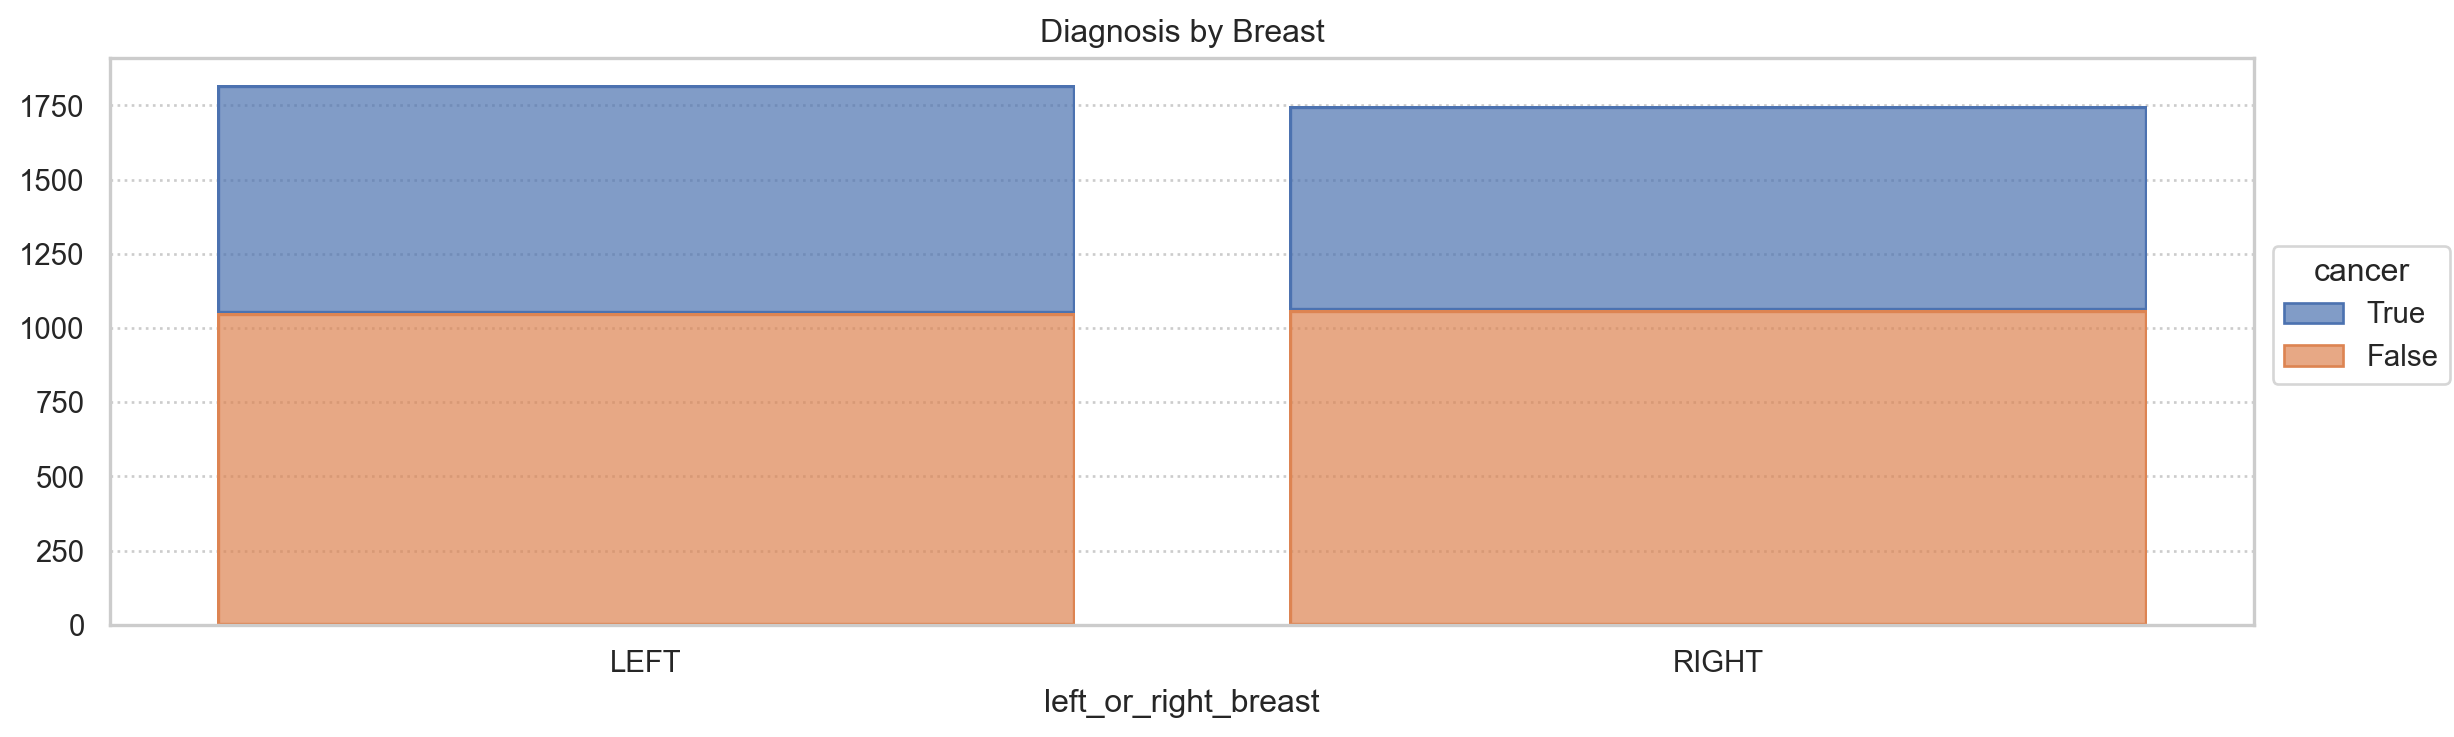

In [27]:
sns.objects.Plot(df, x='left_or_right_breast', color='cancer').add(so.Bar(), so.Count(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Breast").layout(size=(12,4), engine='tight')

If there is a slightly greater risk of cancer in the left breast, it would not be evident in the CBIS-DDSM data.

In [28]:
cv = cases.stats.cramersv(a='left_or_right_breast', b='cancer')
print(cv)



                            CramersV                            
                            Name | Cramer's V
                           Value | 0.028861432861833916
                          Pvalue | 0.08480010265447133
                           Alpha | 0.05
                        Strength | Negligible
                               A | left_or_right_breast
                               B | cancer
                               N | 3566
                             Dof | 1
                         X2alpha | 0.05
                              X2 | 2.970414906184831
                           X2dof | 1




The chi-square test above, indicates a non-significant association of negligible effect between breast and diagnosis, ($X^2$ (1,n=3566)=2.97 p=0.08, $\phi$=.03). 

#### Cancer by Image View
A study published in RSNA Journals {cite}`korhonenBreastCancerConspicuity2019` analyzed breast cancer conspicuity by view and determined that cancers were more likely to be high conspicuity in the craniocaudal (CC) than the mediolateral oblique (MLO) view.  Let's see what our data suggest.

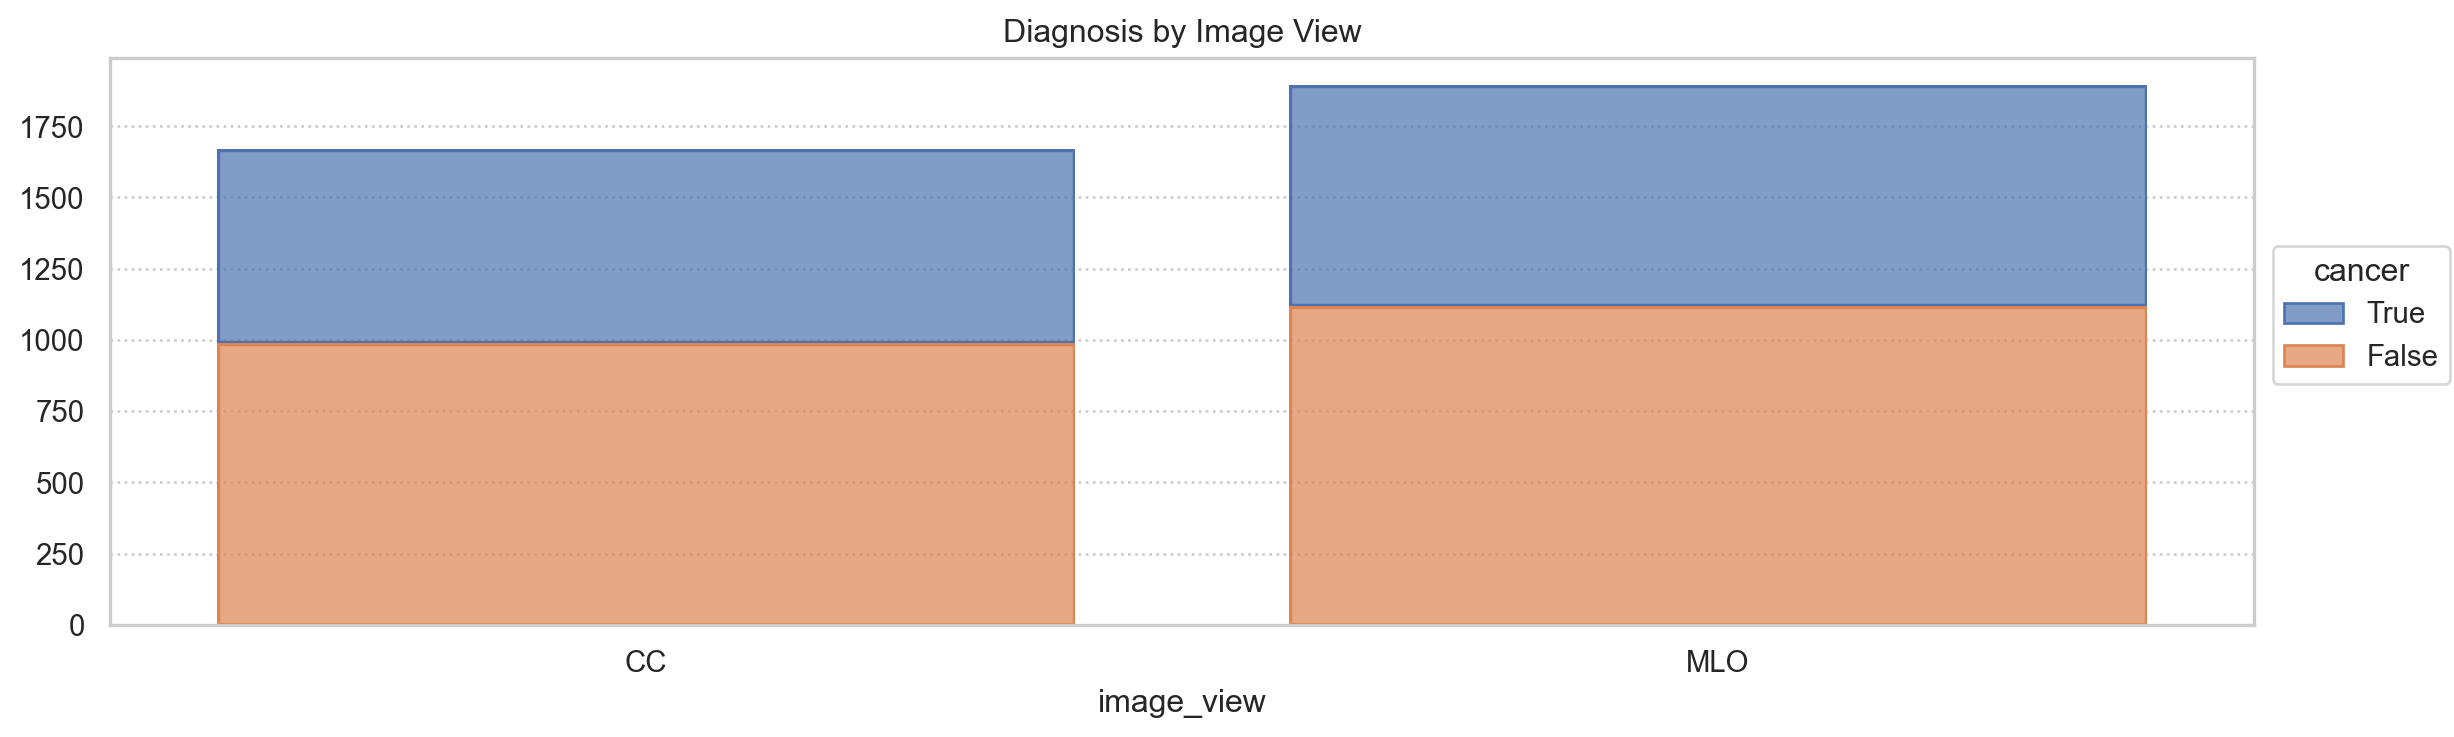

In [29]:
sns.objects.Plot(df, x='image_view', color='cancer').add(so.Bar(), so.Count(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Image View").layout(size=(12,4), engine='tight')

In [30]:
df[[ 'cancer', 'image_view']].groupby(by=['image_view']).value_counts(normalize=True).to_frame()

proportion
image_view cancer            
CC         False         0.59
           True          0.41
MLO        False         0.59
           True          0.41

Both views have the same proportion of malignancies suggesting no association between image view and the diagnosis.  

In [31]:
cv = cases.stats.cramersv(a='image_view', b='cancer')
print(cv)



                            CramersV                            
                            Name | Cramer's V
                           Value | 0.0014163311721585292
                          Pvalue | 0.9325971883801198
                           Alpha | 0.05
                        Strength | Negligible
                               A | image_view
                               B | cancer
                               N | 3566
                             Dof | 1
                         X2alpha | 0.05
                              X2 | 0.007153374565586881
                           X2dof | 1




The chi-square test above, indicates a non-significant association of negligible effect between image view and diagnosis, ($X^2$ (1,n=3566)=0.007 p=0.93, $\phi$=.002). 

#### Cancer by Abnormality Type
Is abnormality type an indicator of malignancy?

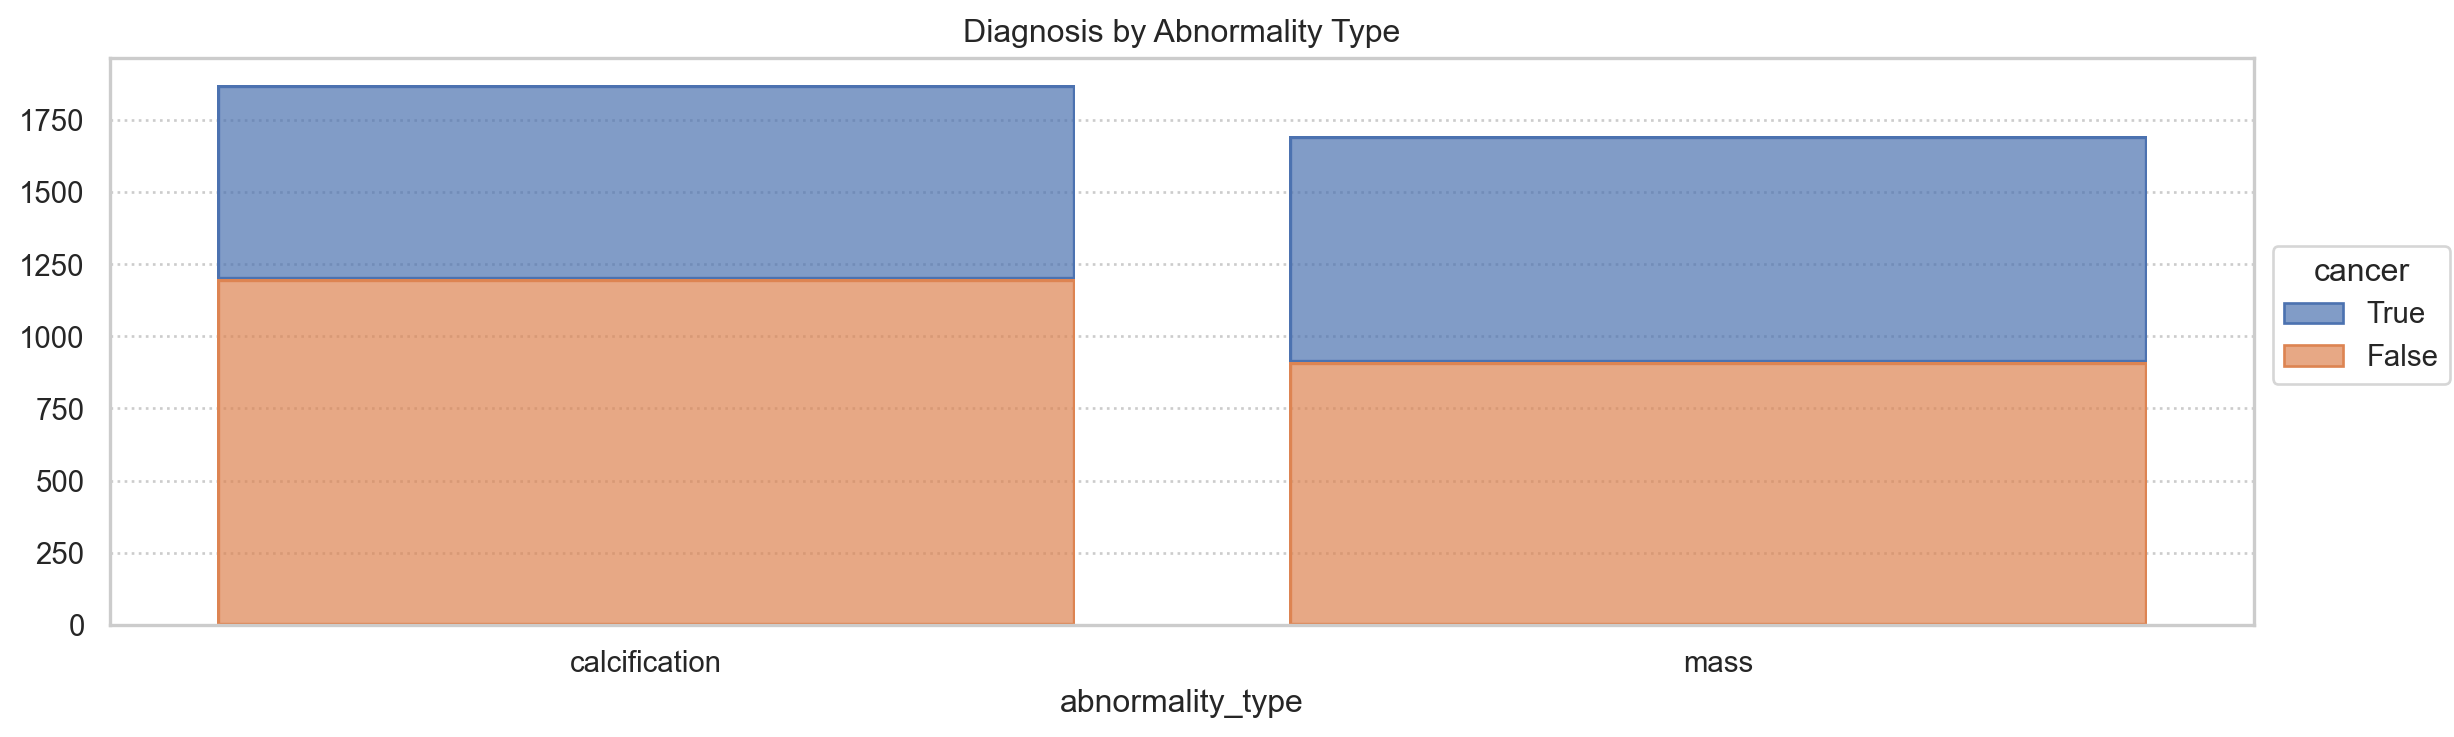

In [32]:
sns.objects.Plot(df, x='abnormality_type', color='cancer').add(so.Bar(), so.Count(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Abnormality Type").layout(size=(12,4), engine='tight')

In [33]:
df[[ 'cancer', 'abnormality_type']].groupby(by=['cancer']).value_counts(normalize=True).to_frame()

proportion
cancer abnormality_type            
False  calcification           0.57
       mass                    0.43
True   mass                    0.54
       calcification           0.46

These data indicate that the probability of a malignancy is slightly higher for masses than calcifications. Is this significant?

In [34]:
cv = cases.stats.cramersv(a='abnormality_type', b='cancer')
print(cv)



                            CramersV                            
                            Name | Cramer's V
                           Value | 0.10437040964253724
                          Pvalue | 4.5880686528820935e-10
                           Alpha | 0.05
                        Strength | Small
                               A | abnormality_type
                               B | cancer
                               N | 3566
                             Dof | 1
                         X2alpha | 0.05
                              X2 | 38.84508847031938
                           X2dof | 1




The chi-square test above, indicates a significant association of small effect between abnormality type and diagnosis, ($X^2$ (1,n=3566)=38.85 p<0.01, $\phi$=.10). More malignancies were diagnosed among the mass cases, compared to calcifications (54% vs 46%).

#### BI-RADS Assessment and Cancer
The BI-RADS assessment is an overall summary of the mammography report and has seven categories.

| Label | Description                                                                              | Likelihood of Cancer                                                        |
| ----- | ---------------------------------------------------------------------------------------- | --------------------------------------------------------------------------- |
| 0     | Incomplete . Need Additional   Imaging Evaluation and/or Prior Mammograms for Comparison | NA                                                                          |
| 1     | Negative Routine mammography                                                             | Essentially 0% likelihood of malignancy                                     |
| 2     | Benign Routine mammography                                                               | Essentially 0% likelihood of malignancy                                     |
| 3     | Probably Benign Short-interval   (6-month)                                               | > 0% but . 2% likelihood of malignancy                                      |
| 4     | Suspicious                                                                               | Low: 2% to ≤ 10%      Moderate: > 10% to ≤ 50%       High: > 50% to < 95% |
| 5     | Highly Suggestive of Malignancy                                                          | > 95% likelihood of malignancy                                              |
| 6     | Known Biopsy-Proven Malignancy                                                           | NA                                                                          |

To what degree is there agreement between the BI-RADS assessments and diagnosis.

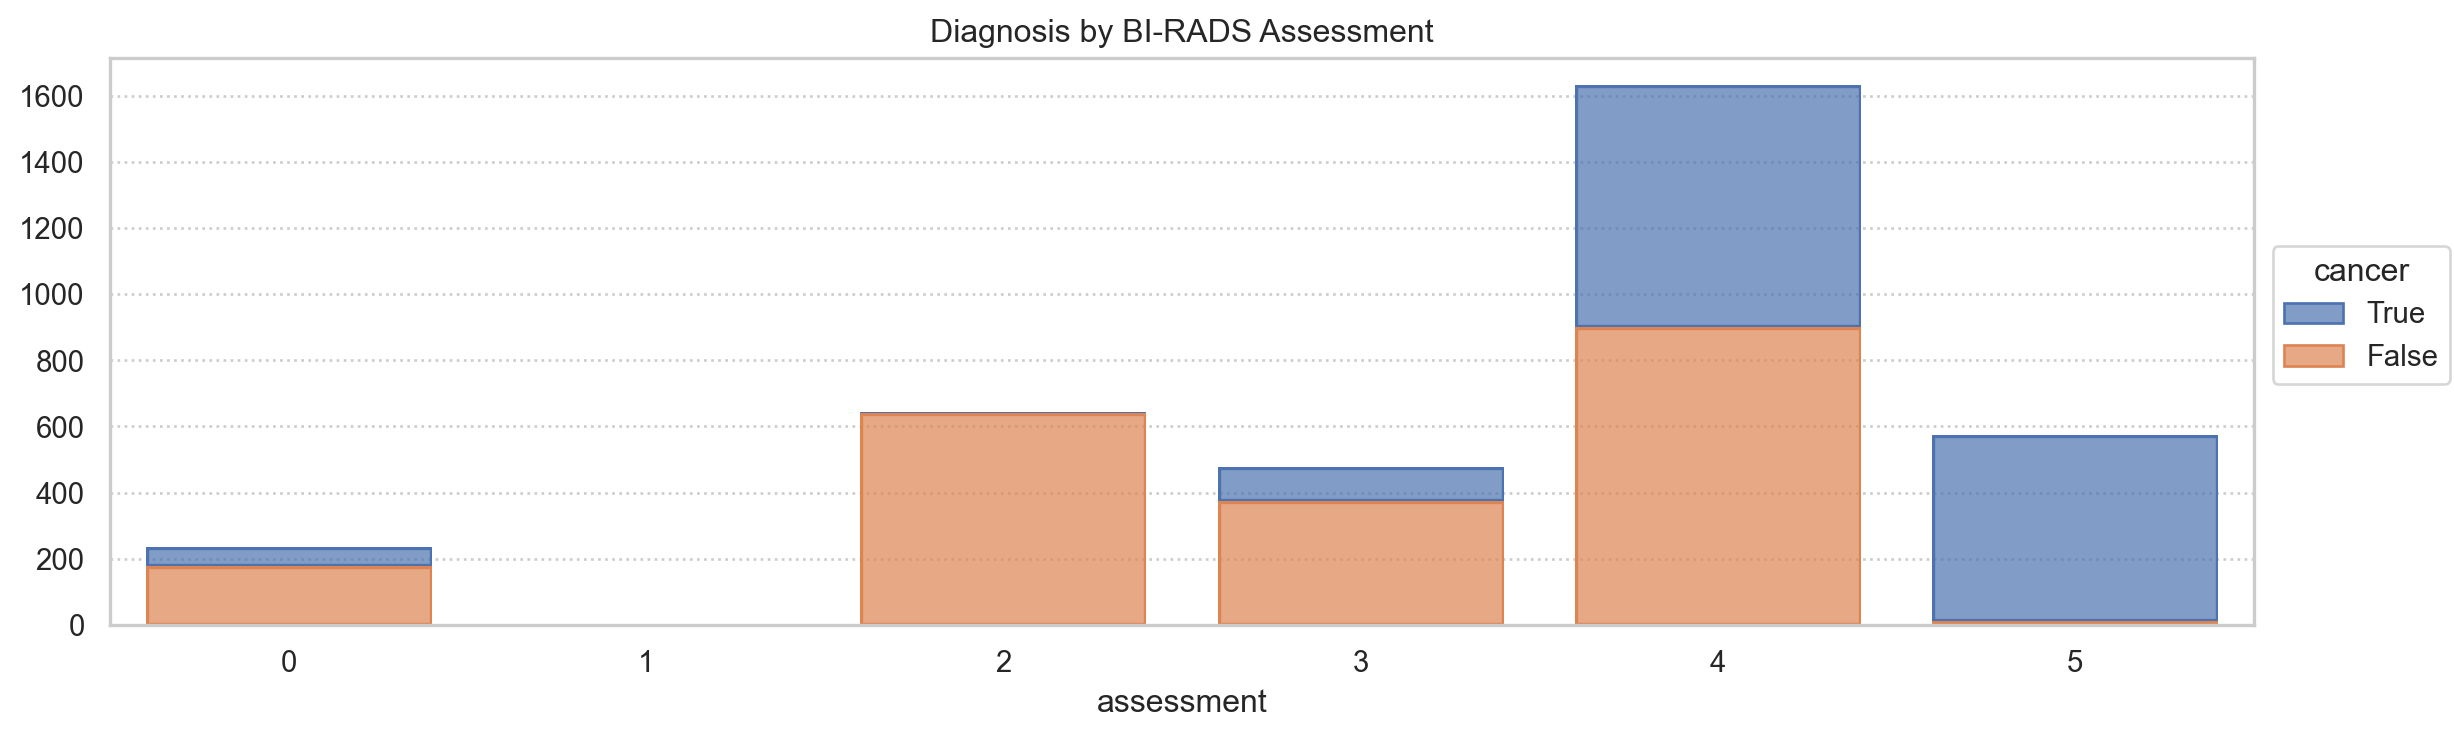

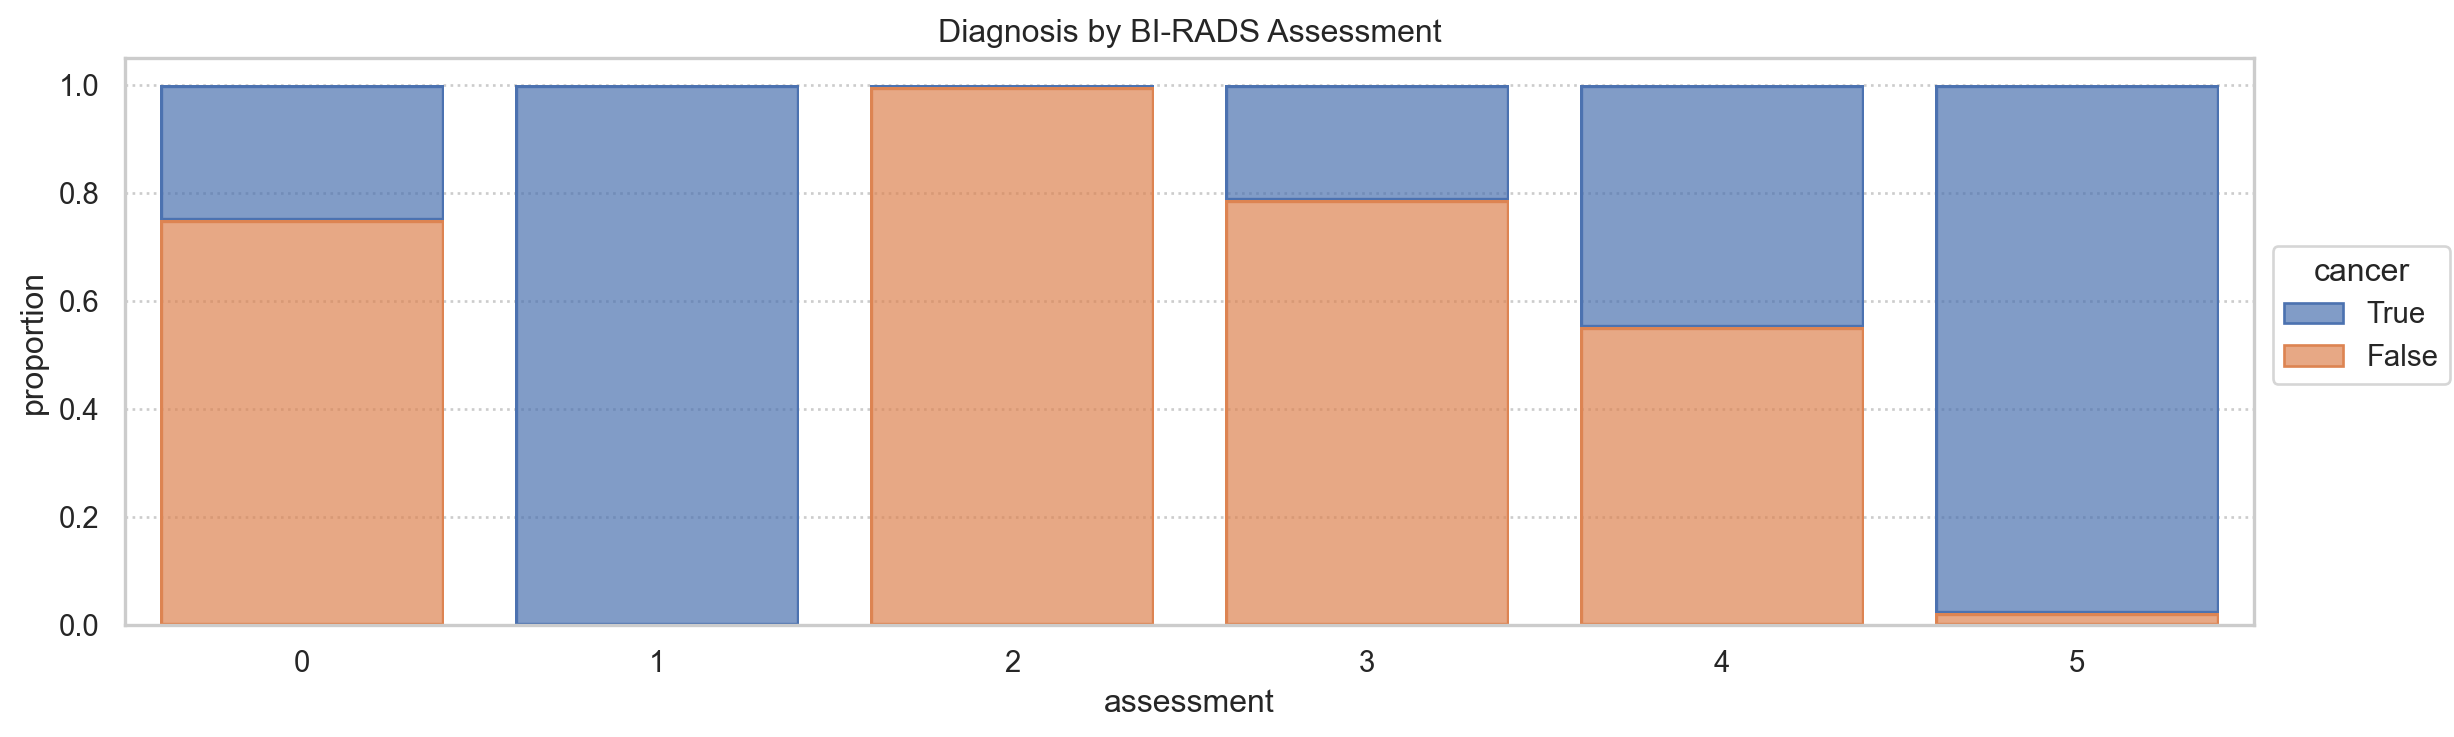

In [35]:
sns.objects.Plot(df, x='assessment', color='cancer').add(so.Bar(), so.Count(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by BI-RADS Assessment").layout(size=(12,4), engine='tight')
prop = df[['assessment', 'cancer']].groupby(by=['assessment']).value_counts(normalize=True).to_frame().reset_index().sort_values(by=['assessment','cancer'])
sns.objects.Plot(prop, x='assessment', y='proportion', color='cancer').add(so.Bar(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by BI-RADS Assessment").layout(size=(12,4), engine='tight')

In [36]:
counts = df[[ 'assessment', 'cancer']].groupby(by=['assessment']).value_counts(normalize=False).to_frame().sort_values(by=['assessment', 'cancer'])
prop = df[[ 'assessment', 'cancer']].groupby(by=['assessment']).value_counts(normalize=True).to_frame().sort_values(by=['assessment', 'cancer'])

df1_style = counts.style.set_table_attributes("style='display:inline; margin-right:220px;'").set_caption("Cancer Diagnosis by BI-RADS Assessment")
df2_style = prop.style.set_table_attributes("style='display:inline; margin-right:120px'").set_caption("Cancer Diagnosis by BI-RADS Assessment (Proportions)")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

Cancer Diagnosis by BI-RADS Assessment 
 
 
   
   
 count 
 
 
 assessment 
 cancer 
   
 
 
 
 
 0 
 False 
 177 
 
 
 True 
 59 
 
 
 1 
 False 
 0 
 
 
 True 
 3 
 
 
 2 
 False 
 642 
 
 
 True 
 2 
 
 
 3 
 False 
 375 
 
 
 True 
 102 
 
 
 4 
 False 
 902 
 
 
 True 
 731 
 
 
 5 
 False 
 13 
 
 
 True 
 560 
 
 
 

 
 Cancer Diagnosis by BI-RADS Assessment (Proportions) 
 
 
   
   
 proportion 
 
 
 assessment 
 cancer 
   
 
 
 
 
 0 
 False 
 0.750000 
 
 
 True 
 0.250000 
 
 
 1 
 False 
 0.000000 
 
 
 True 
 1.000000 
 
 
 2 
 False 
 0.996894 
 
 
 True 
 0.003106 
 
 
 3 
 False 
 0.786164 
 
 
 True 
 0.213836 
 
 
 4 
 False 
 0.552358 
 
 
 True 
 0.447642 
 
 
 5 
 False 
 0.022688 
 
 
 True 
 0.977312

These data do show a relationship between BI-RADS assessment and diagnosis. Let's evaluate the effect size.

In [37]:
kt = cases.stats.kendallstau(a='assessment', b='cancer')
print(kt)



                          KendallsTau                           
                            Name | Kendall's τ
                           Value | 0.5994799138998625
                          Pvalue | 1.4696313517612682e-244
                           Alpha | 0.05
                               A | assessment
                               B | cancer
                               N | 3566
                        Strength | Strong




Indeed, the Kendall's Tau test above, indicates a significant association of strong effect between BI-RADS assessment and diagnosis, ($\phi_\tau$=0.60, p<0.01).

Several observations. 
1. Incomplete assessments had a malignancy approaching 25%.
2. There were only three BI-RADS Category 1 assessments.
3. Category 2 assessments, were all negative for cancer.
4. At Category 3 and above, we see a sharp increase in the proportion of cancer diagnoses.

#### Subtlety and Cancer
Are malignancies more or less conspicuous?

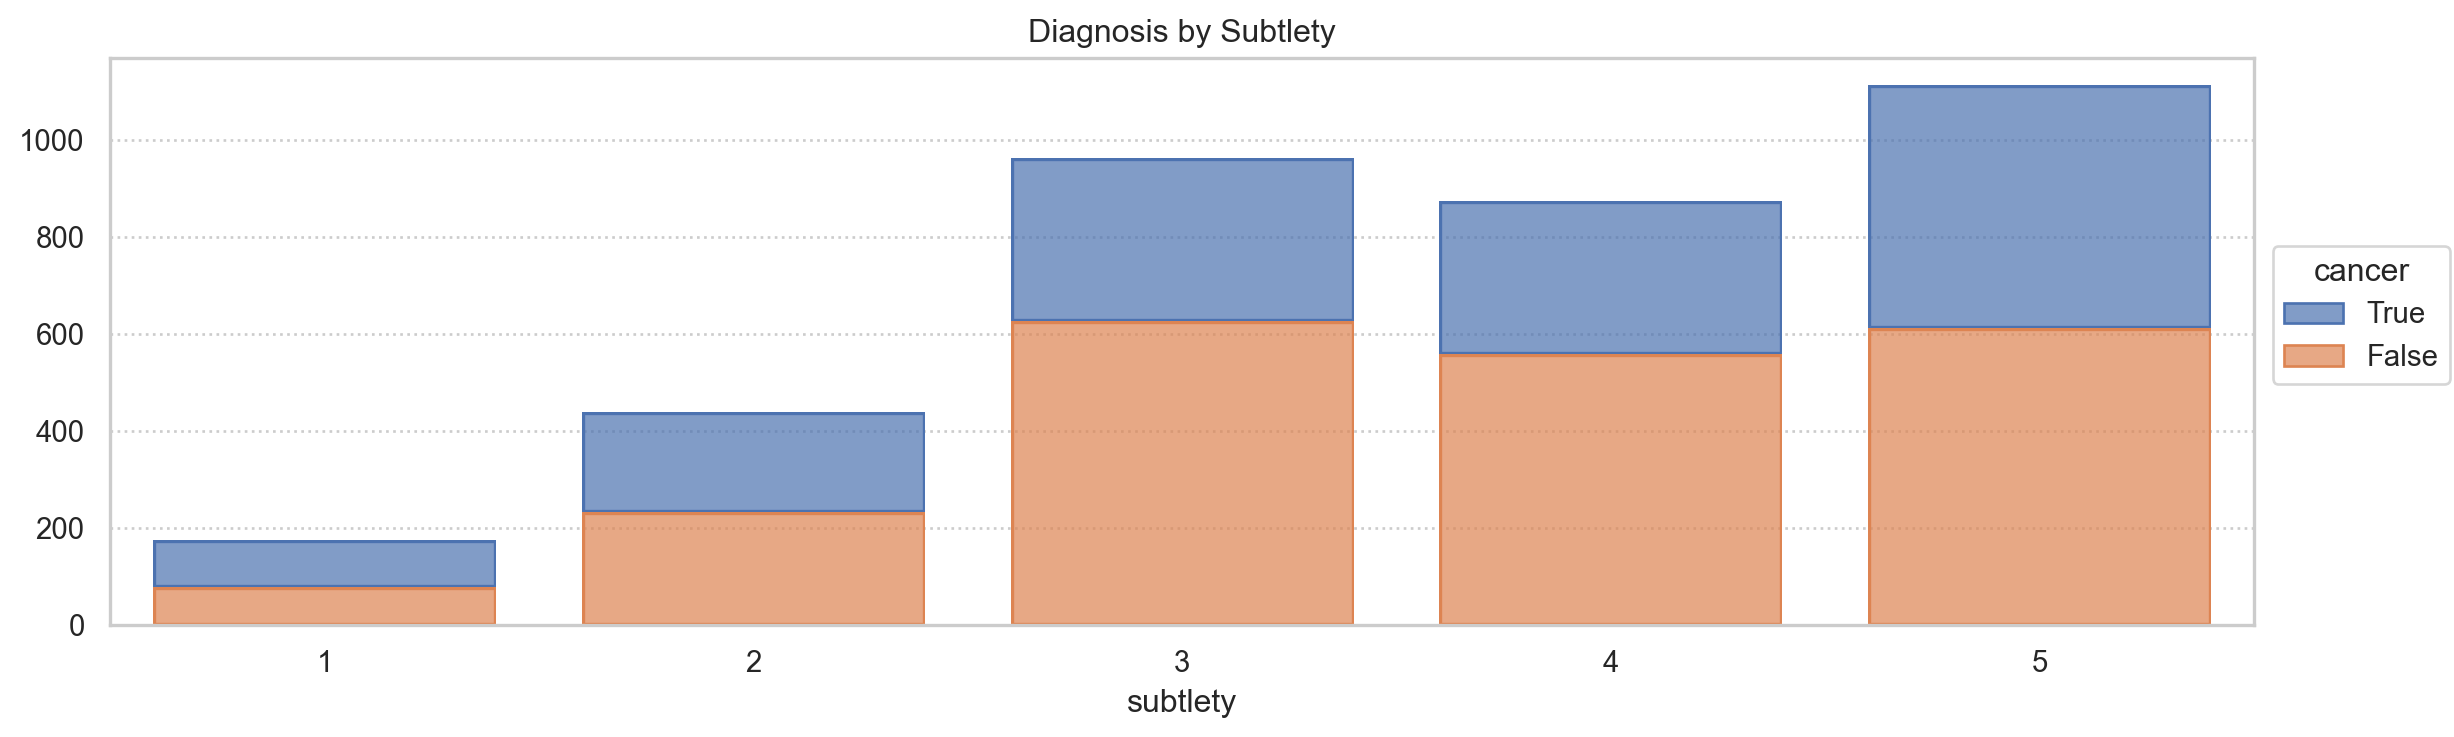

In [38]:
sns.objects.Plot(df, x='subtlety', color='cancer').add(so.Bar(), so.Count(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Subtlety").layout(size=(12,4), engine='tight')

Any association between subtlety and malignancy isn't clear from the above. Let's examine the relative proportions of malignancy vis-a-vis subtlety.

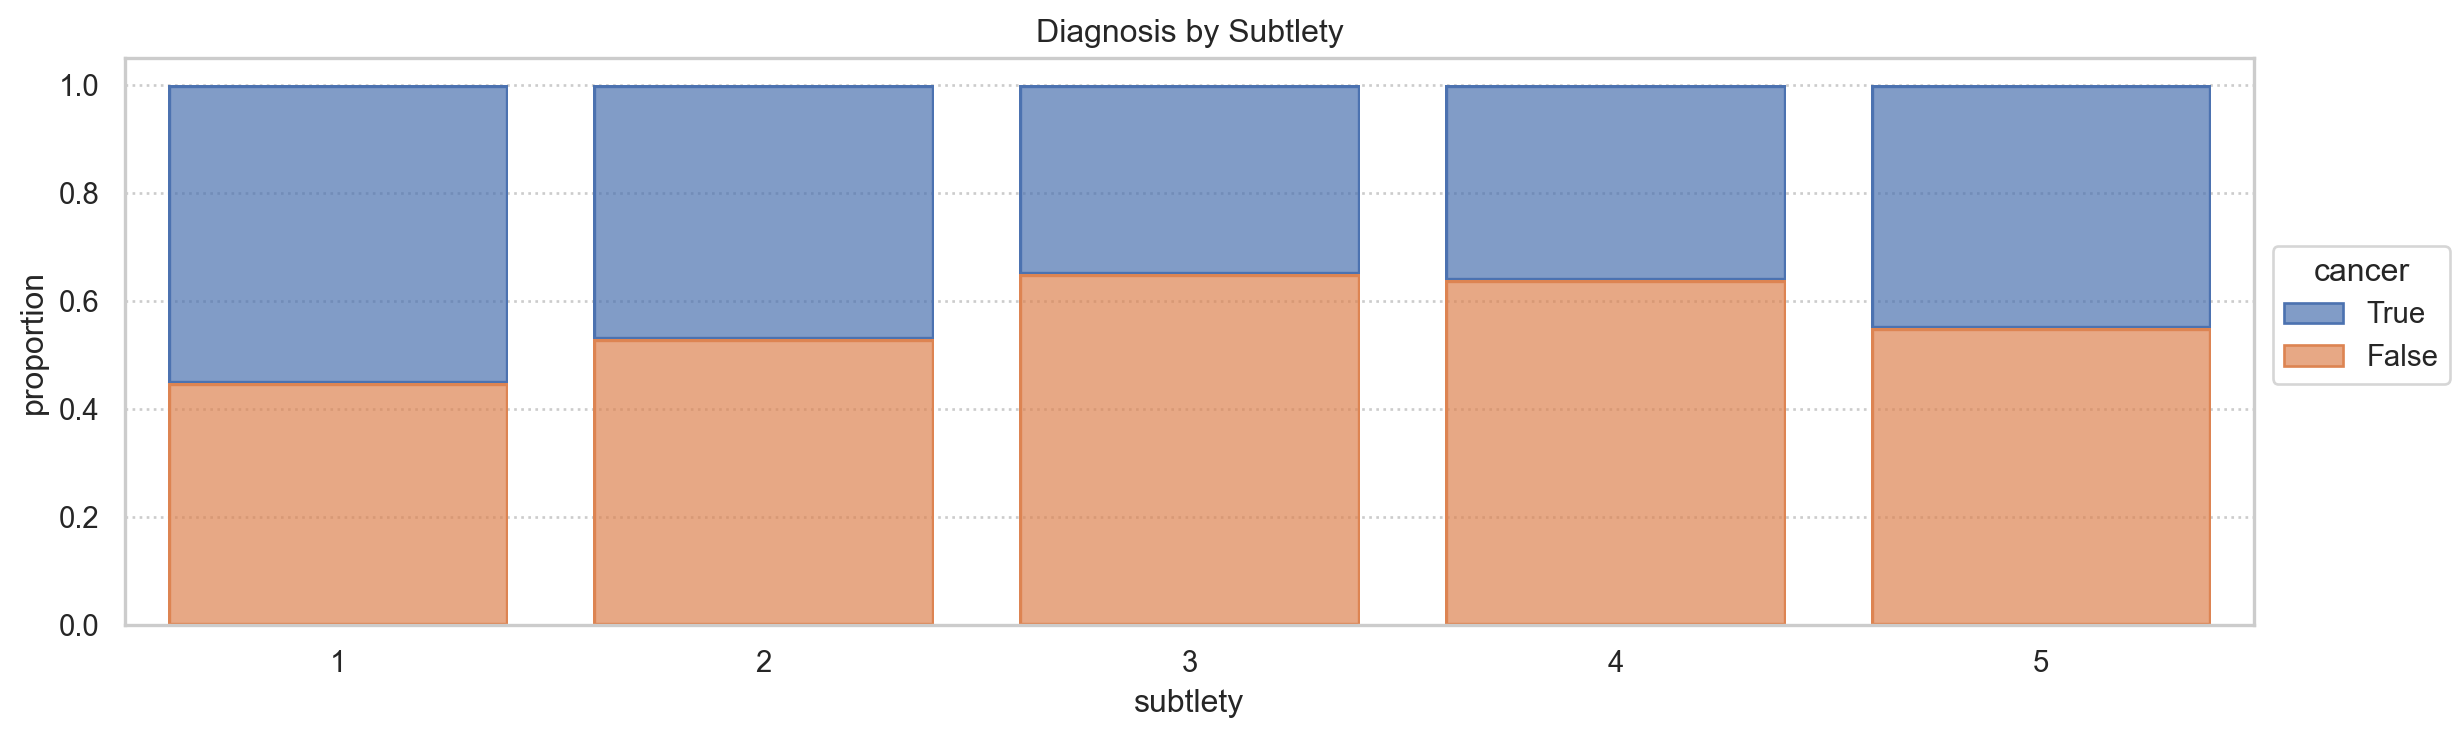

In [39]:
prop = df[['subtlety', 'cancer']].groupby(by=['subtlety']).value_counts(normalize=True).to_frame().reset_index().sort_values(by=['subtlety','cancer'])
sns.objects.Plot(prop, x='subtlety', y='proportion', color='cancer').add(so.Bar(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Subtlety").layout(size=(12,4), engine='tight')

An association seems to be present. Let's look at the numbers.

In [40]:
counts = df[[ 'subtlety', 'cancer']].groupby(by=['subtlety']).value_counts(normalize=False).to_frame().sort_values(by=['subtlety', 'cancer'])
prop = df[[ 'subtlety', 'cancer']].groupby(by=['subtlety']).value_counts(normalize=True).to_frame().sort_values(by=['subtlety', 'cancer'])

df1_style = counts.style.set_table_attributes("style='display:inline; margin-right:220px;'").set_caption("Cancer Diagnosis by Subtlety")
df2_style = prop.style.set_table_attributes("style='display:inline; margin-right:120px'").set_caption("Cancer Diagnosis by Subtlety (Proportions)")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

Cancer Diagnosis by Subtlety 
 
 
   
   
 count 
 
 
 subtlety 
 cancer 
   
 
 
 
 
 1 
 False 
 78 
 
 
 True 
 96 
 
 
 2 
 False 
 232 
 
 
 True 
 207 
 
 
 3 
 False 
 627 
 
 
 True 
 337 
 
 
 4 
 False 
 559 
 
 
 True 
 316 
 
 
 5 
 False 
 613 
 
 
 True 
 501 
 
 
 

 
 Cancer Diagnosis by Subtlety (Proportions) 
 
 
   
   
 proportion 
 
 
 subtlety 
 cancer 
   
 
 
 
 
 1 
 False 
 0.448276 
 
 
 True 
 0.551724 
 
 
 2 
 False 
 0.528474 
 
 
 True 
 0.471526 
 
 
 3 
 False 
 0.650415 
 
 
 True 
 0.349585 
 
 
 4 
 False 
 0.638857 
 
 
 True 
 0.361143 
 
 
 5 
 False 
 0.550269 
 
 
 True 
 0.449731

Again, it would be difficult to draw an inference of association between subtlety and diagnosis.

In [41]:
kt = cases.stats.kendallstau(a='subtlety', b='cancer')
print(kt)



                          KendallsTau                           
                            Name | Kendall's τ
                           Value | 0.003196827770471352
                          Pvalue | 0.8618112089236021
                           Alpha | 0.05
                               A | subtlety
                               B | cancer
                               N | 3566
                        Strength | Weak




The Kendall's Tau test measuring the association between subtlety and malignancy indicated a non-significant association of weak effect, $\phi_\tau$ = 0.003, p = 0.86.

#### Calcification Type and Cancer
What is the association between calcification type and malignancy. According to the literature, fine linear branching, and pleomorphic calcifications are of the highest concern, followed by amorphous and coarse heterogenous abnormalities. 

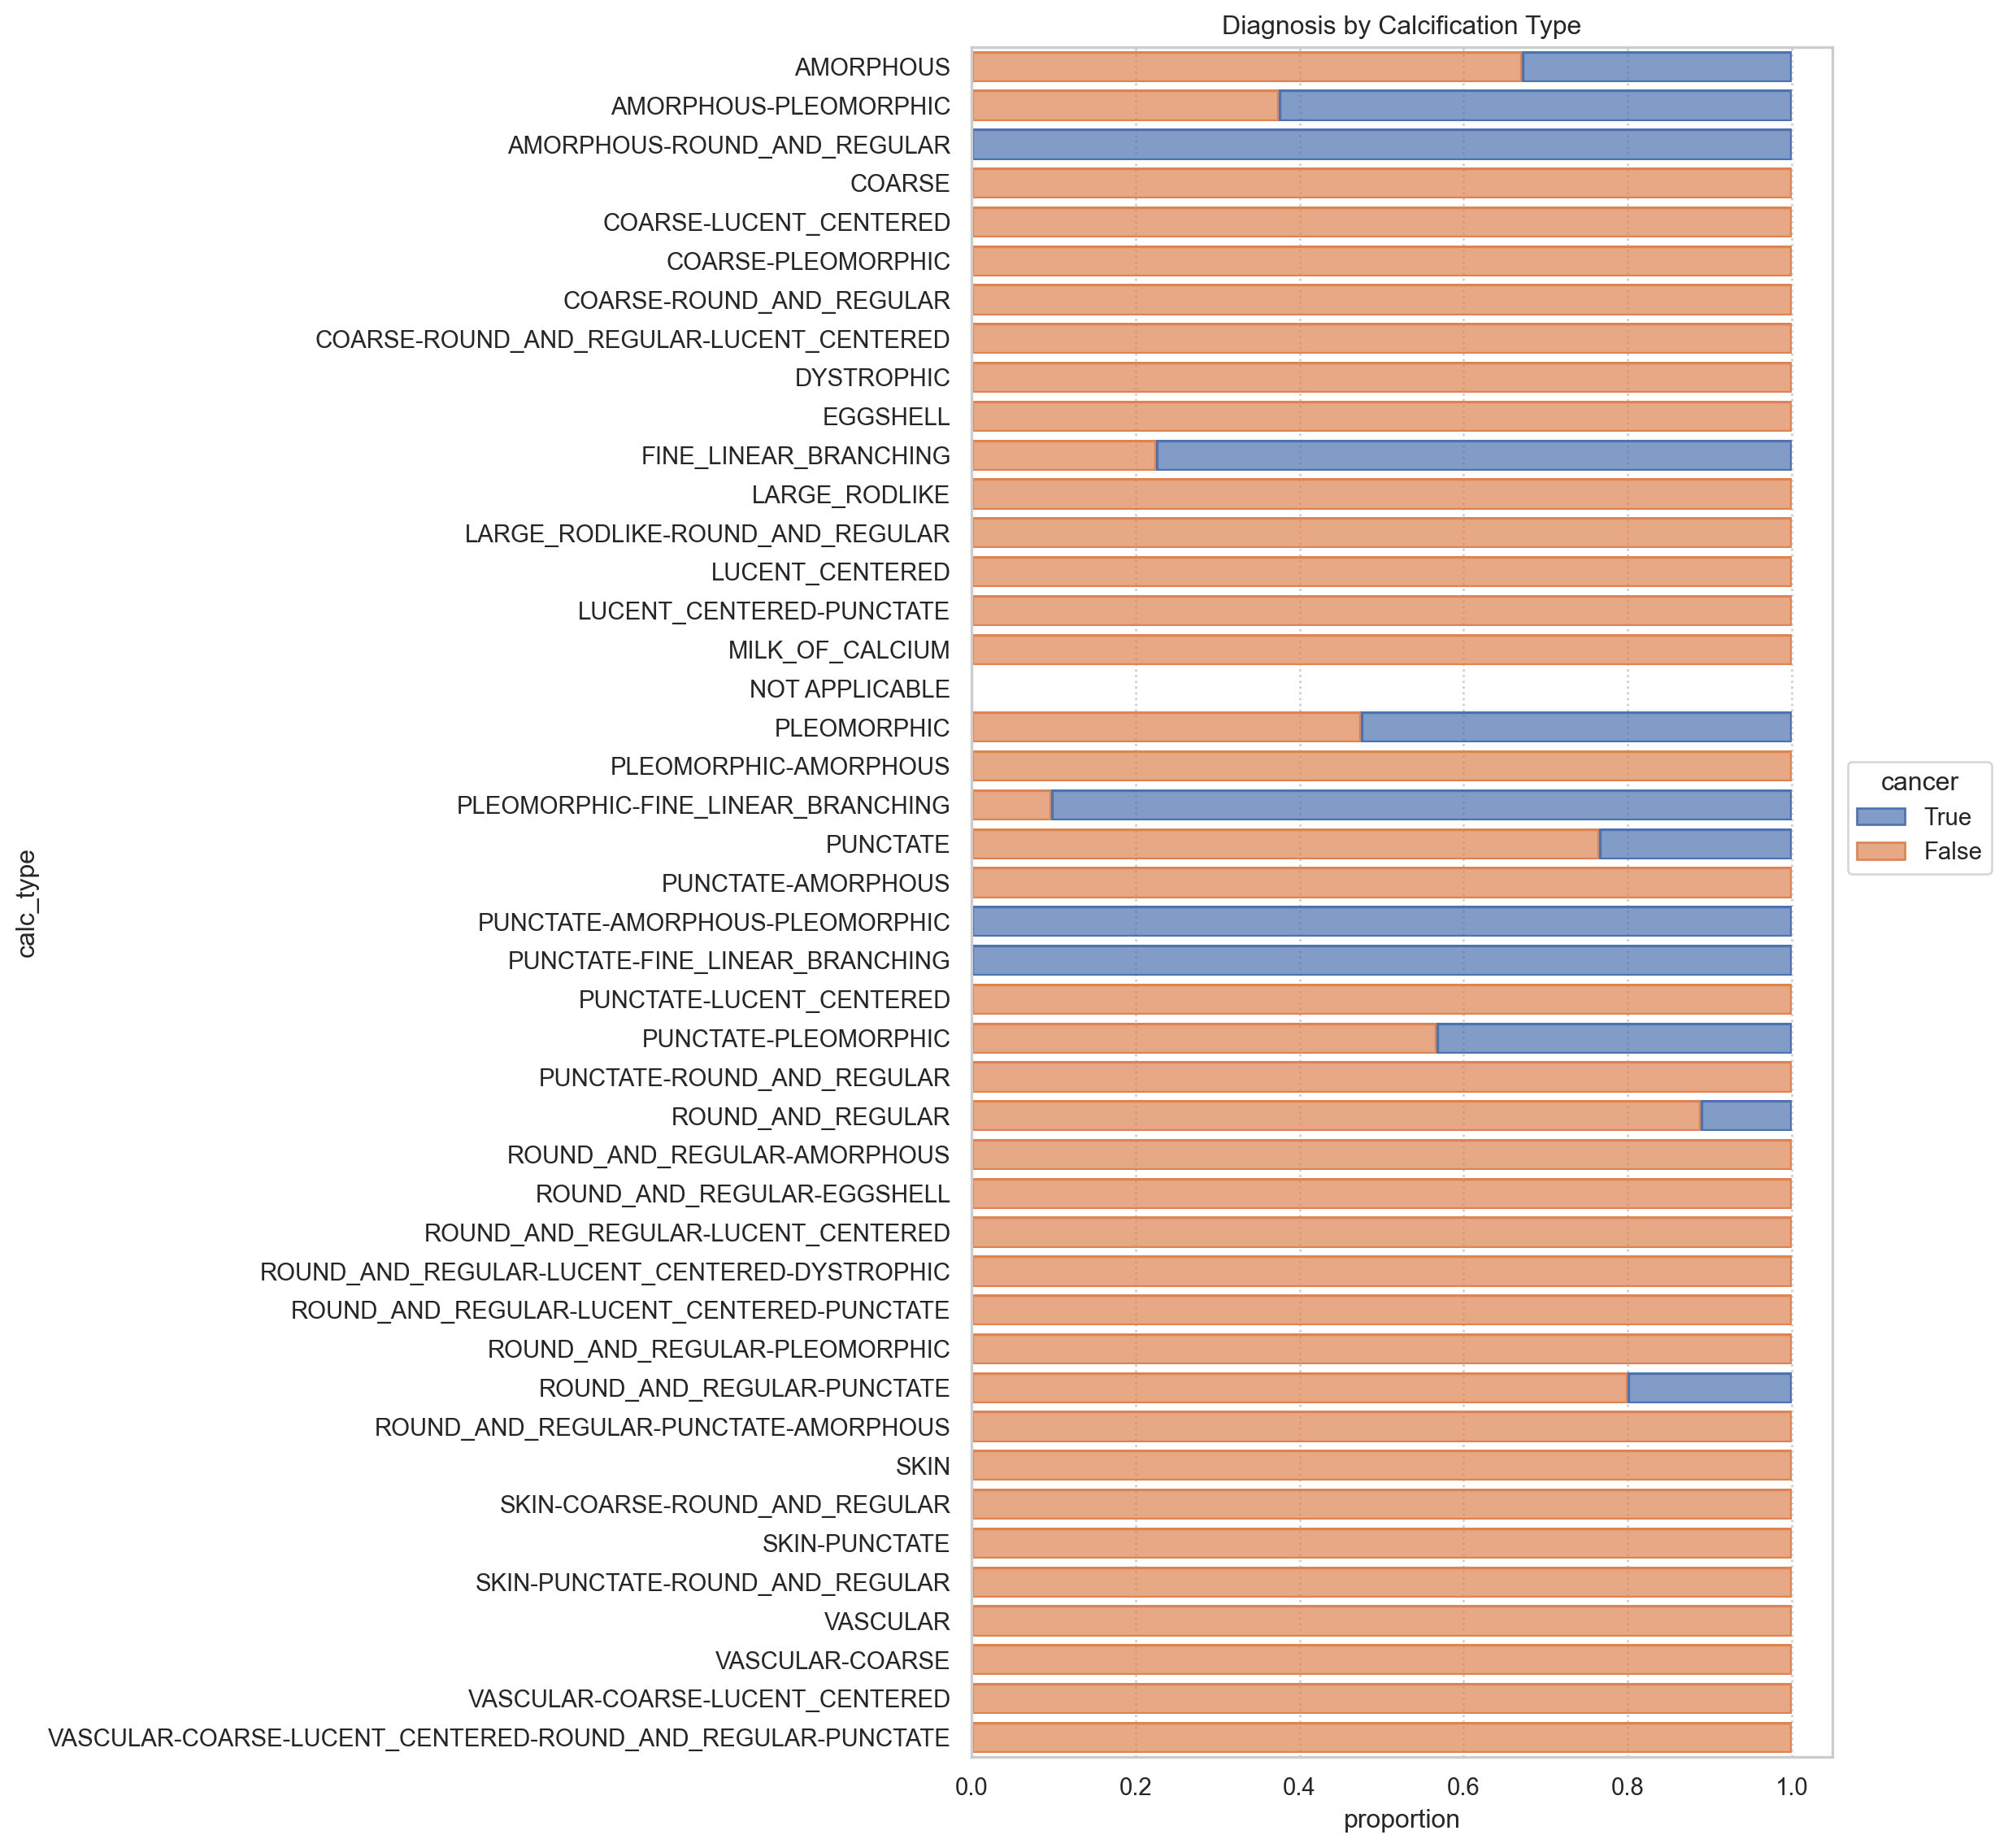

In [42]:
df_calc = calc.as_df()
prop = df_calc[['calc_type', 'cancer']].groupby(by=['calc_type']).value_counts(normalize=True).to_frame().reset_index().sort_values(by=['calc_type','cancer'])
sns.objects.Plot(prop, y='calc_type', x='proportion', color='cancer').add(so.Bar(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Calcification Type").layout(size=(12,12), engine='tight')

As this plot suggests, an association between calcification type and diagnosis is extant. Let's check the strength of this association.

In [43]:
cv = calc.stats.cramersv(a='calc_type', b='cancer')
print(cv)



                            CramersV                            
                            Name | Cramer's V
                           Value | 0.5363368552127653
                          Pvalue | 2.078377585363777e-87
                           Alpha | 0.05
                        Strength | Large
                               A | calc_type
                               B | cancer
                               N | 1872
                             Dof | 1
                         X2alpha | 0.05
                              X2 | 538.4943200698192
                           X2dof | 42




This chi-square test of independence between calcification type and diagnosis indicates a significant association of large effect ($X^2$(1,n=1872)=539.69 p<0.01, $V$=0.54).

The following lists the top 10 most malignant calcification types by proportion in the CBIS-DDSM. 

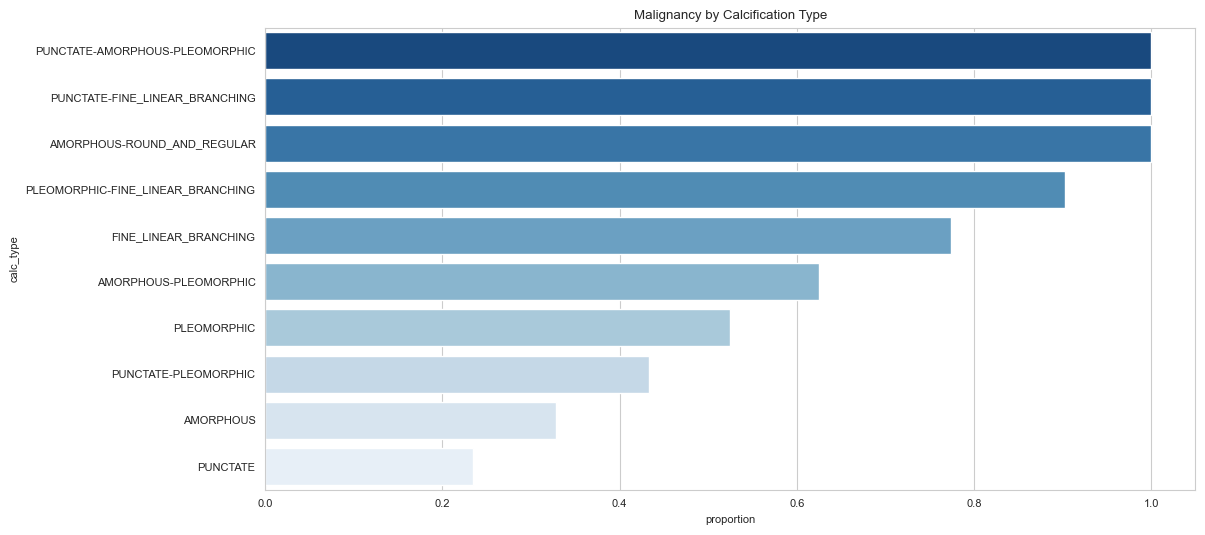

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
calc_types = cases.get_most_malignant_calc(x='calc_type', n=10)
calc.plot.barplot(data=calc_types, y='calc_type', x='proportion', title='Malignancy by Calcification Type', ax=ax)

#### Calcification Distribution
How do we characterize the association between calcification distribution and malignancy?

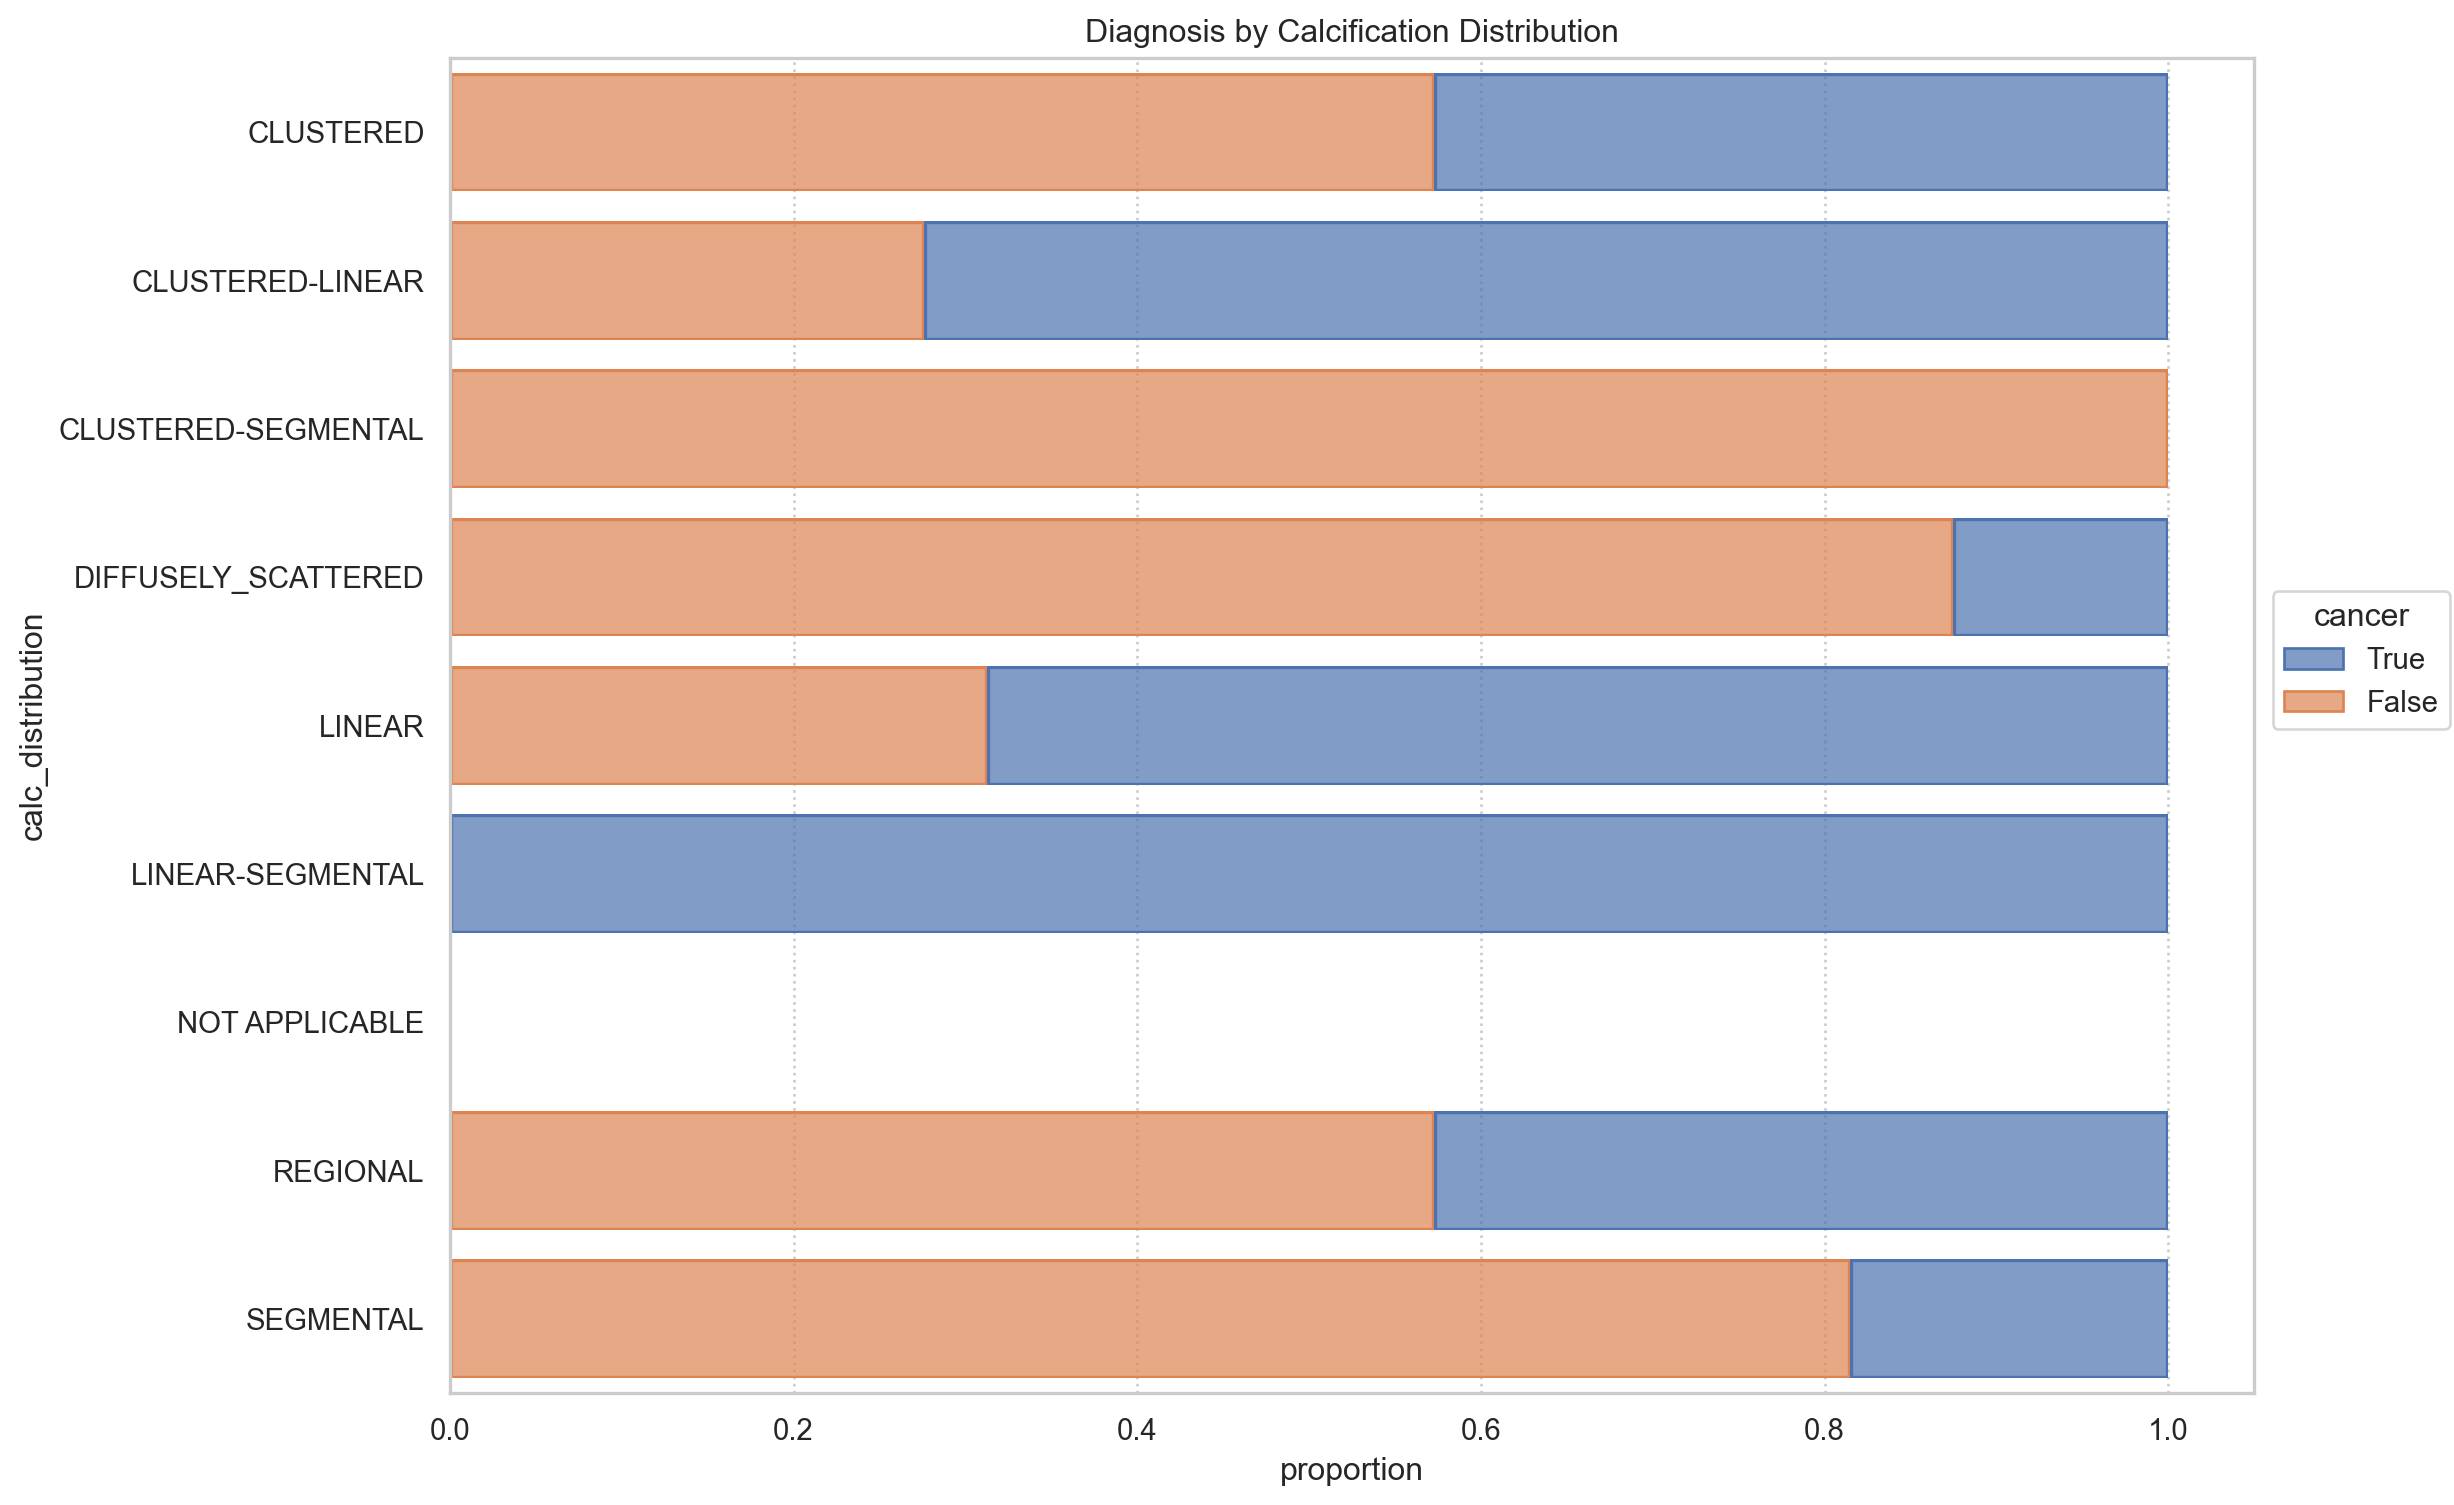

In [45]:
prop = df_calc[['calc_distribution', 'cancer']].groupby(by=['calc_distribution']).value_counts(normalize=True).to_frame().reset_index().sort_values(by=['calc_distribution','cancer'])
sns.objects.Plot(prop, y='calc_distribution', x='proportion', color='cancer').add(so.Bar(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Calcification Distribution").layout(size=(12,8), engine='tight')

Again, we see an association between calcification distribution and malignancy.  Let's check the most malignant calcification distributions.

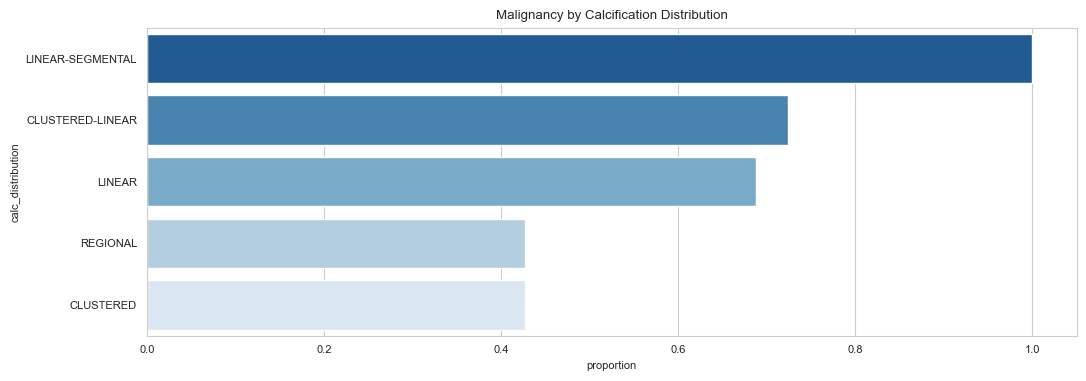

In [46]:
fig, ax = plt.subplots(figsize=(12,4))
calc_types = cases.get_most_malignant_calc(x='calc_distribution', n=5)
calc.plot.barplot(data=calc_types, y='calc_distribution', x='proportion', title='Malignancy by Calcification Distribution', ax=ax)

In [47]:
cv = calc.stats.cramersv(a='calc_distribution', b='cancer')
print(cv)



                            CramersV                            
                            Name | Cramer's V
                           Value | 0.32568564870672534
                          Pvalue | 2.310406740502804e-39
                           Alpha | 0.05
                        Strength | Moderate
                               A | calc_distribution
                               B | cancer
                               N | 1872
                             Dof | 1
                         X2alpha | 0.05
                              X2 | 198.5651774000304
                           X2dof | 7




This chi-square test of independence between calcification distribution and diagnosis indicates a moderate and significant association ($X^2$(1,n=1872)=198.56 p<0.01, $V$=0.33).

#### Mass Shape and Cancer
Mass shape and mass margins are the most significant features that indicate whether a mass is benign or malignant {cite}`bassettAbnormalMammogram2003`. 

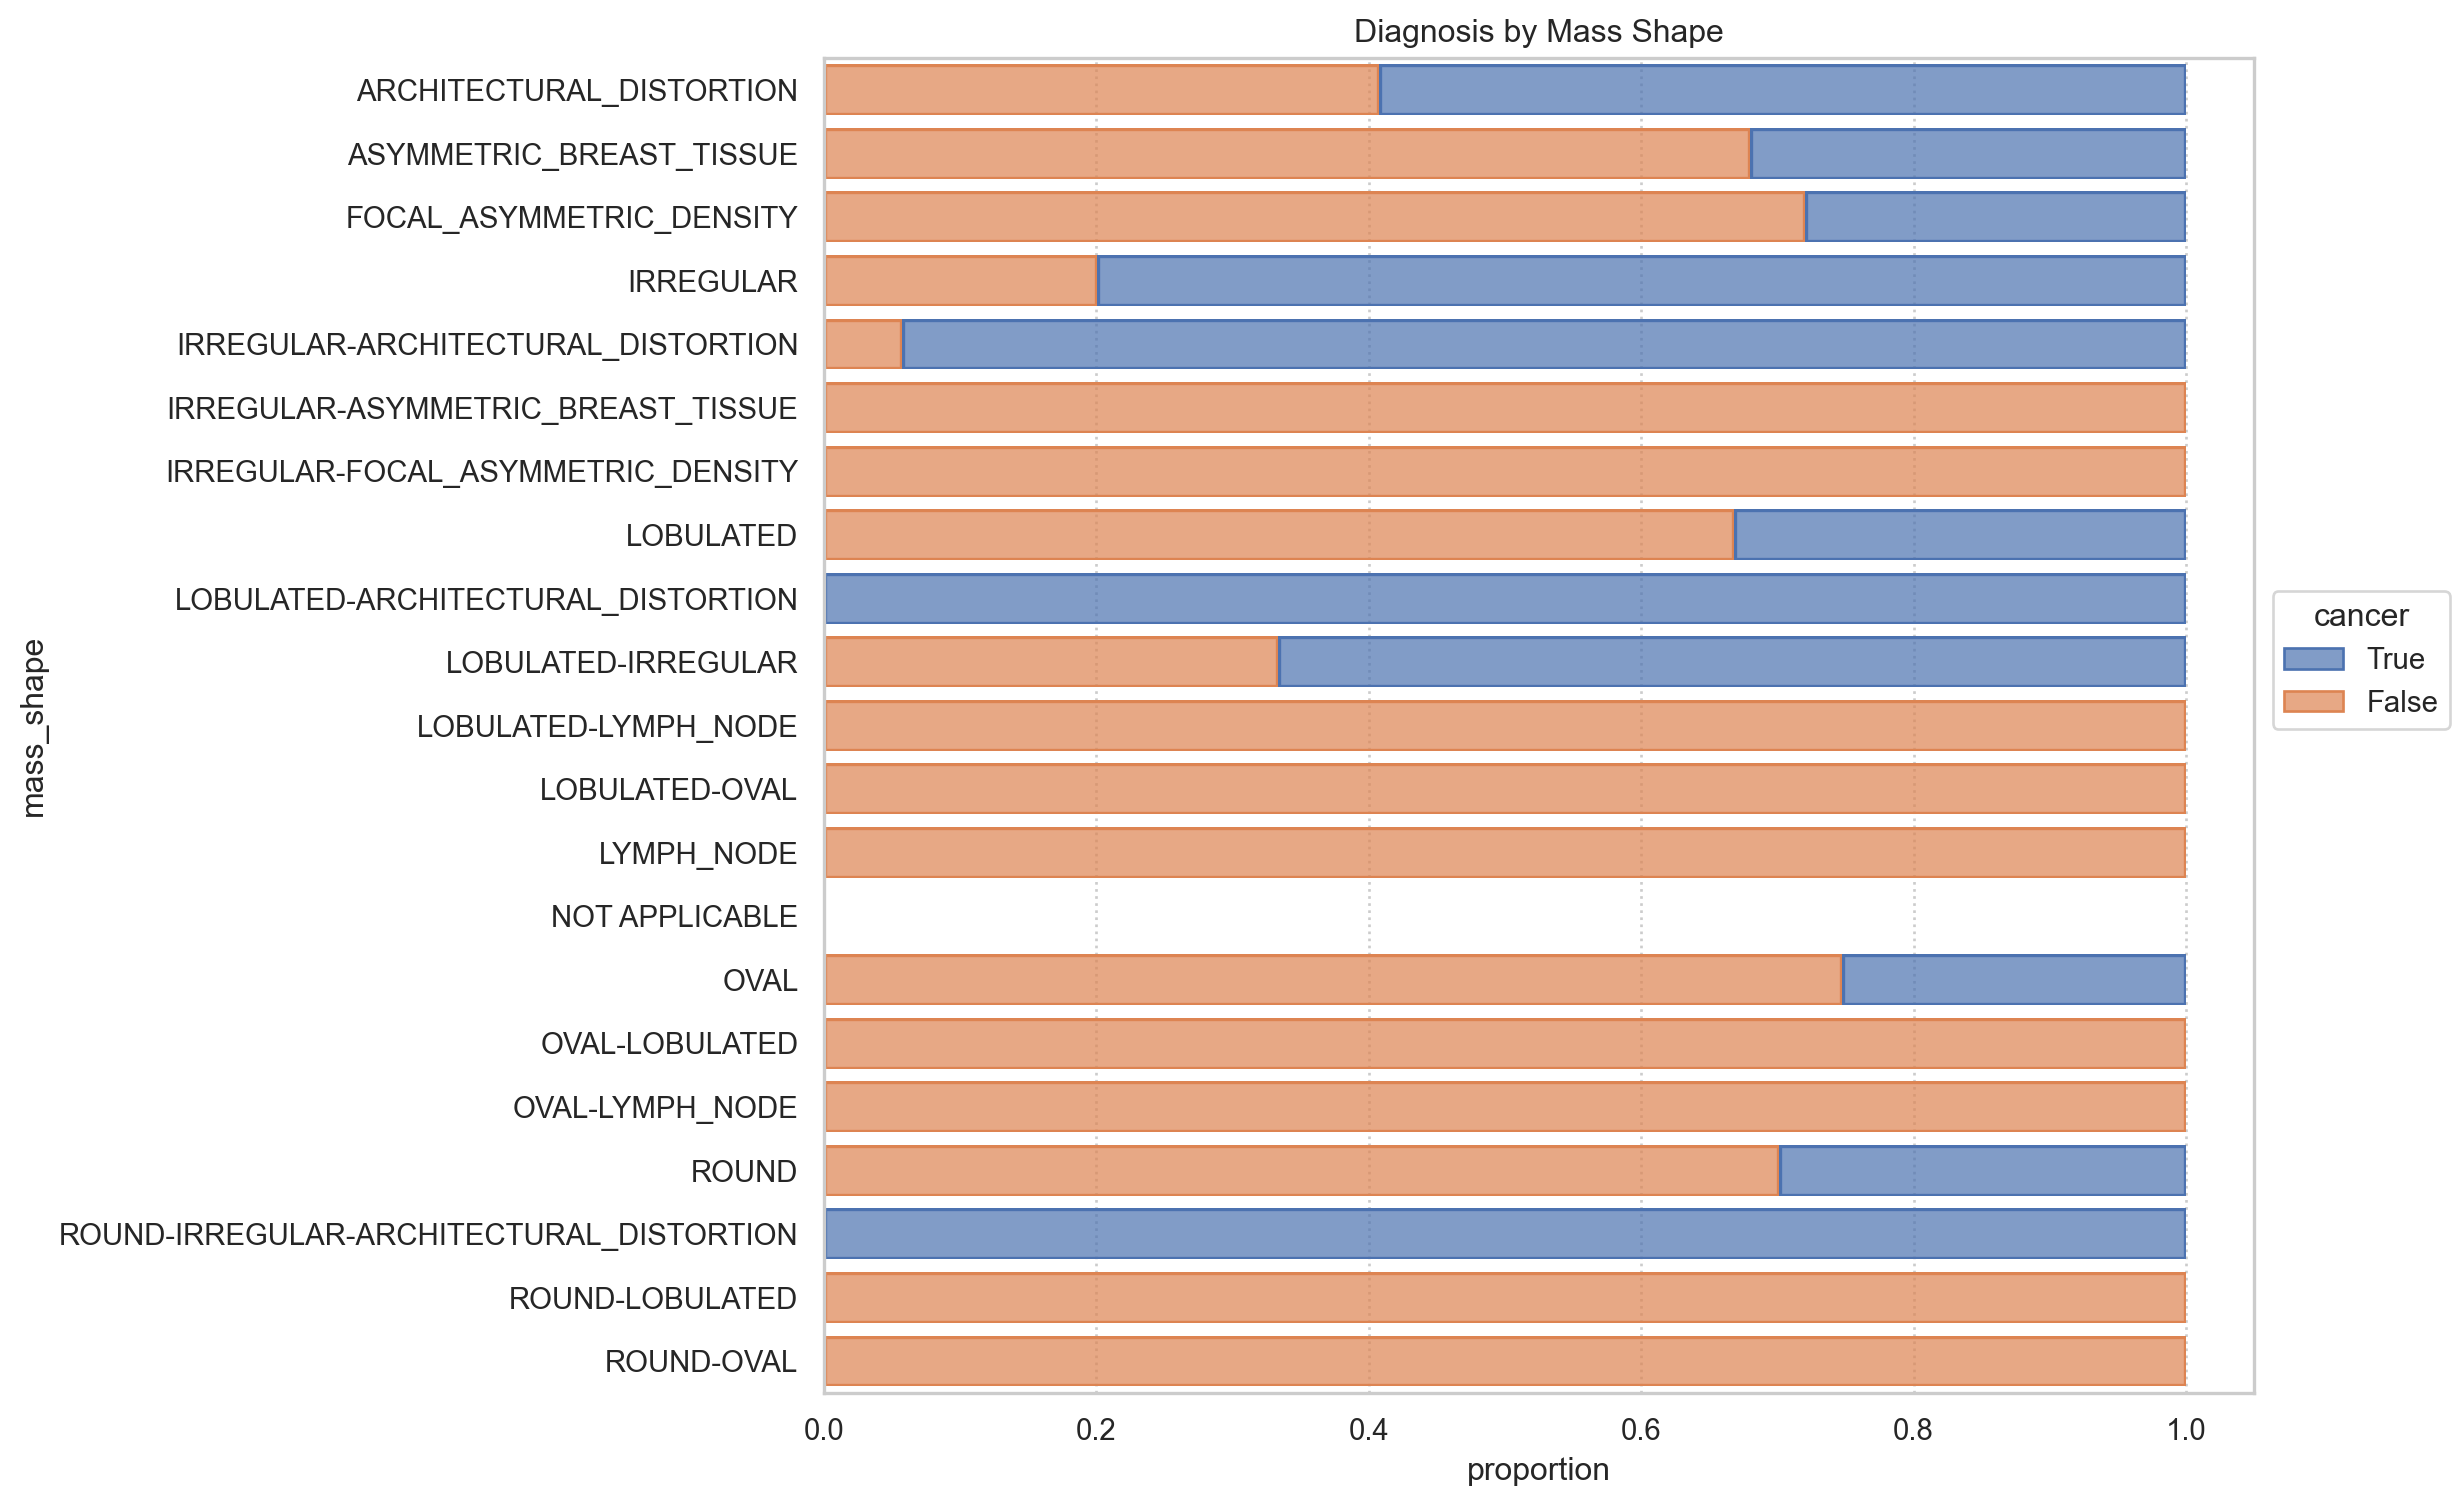

In [48]:
df_mass = mass.as_df()
prop = df_mass[['mass_shape', 'cancer']].groupby(by=['mass_shape']).value_counts(normalize=True).to_frame().reset_index().sort_values(by=['mass_shape','cancer'])
sns.objects.Plot(prop, y='mass_shape', x='proportion', color='cancer').add(so.Bar(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Mass Shape").layout(size=(12,8), engine='tight')

As suggested, an association between mass shape and diagnosis is evident. Which mass shapes are most malignant?

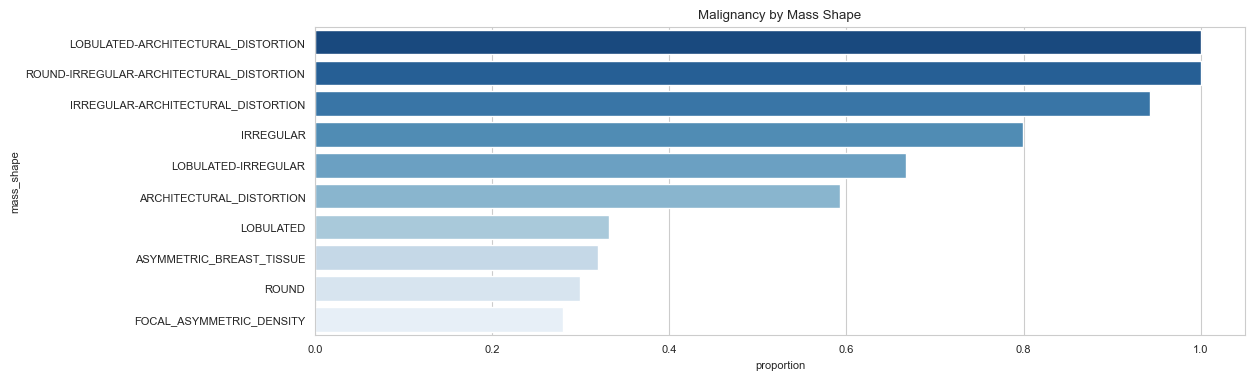

In [49]:
fig, ax = plt.subplots(figsize=(12,4))
mass_shapes = cases.get_most_malignant_mass(x='mass_shape', n=10)
mass.plot.barplot(data=mass_shapes, y='mass_shape', x='proportion', title='Malignancy by Mass Shape', ax=ax)

In [50]:
cv = mass.stats.cramersv(a='mass_shape', b='cancer')
print(cv)



                            CramersV                            
                            Name | Cramer's V
                           Value | 0.510182454781321
                          Pvalue | 1.297593104510473e-81
                           Alpha | 0.05
                        Strength | Large
                               A | mass_shape
                               B | cancer
                               N | 1694
                             Dof | 1
                         X2alpha | 0.05
                              X2 | 440.9247163603807
                           X2dof | 19




This chi-square test of independence between mass shape and diagnosis indicates a large and significant association ($X^2$(1,n=1694)=440.92 p<0.01, $V$=0.51).

#### Mass Margins and Cancer
Mass margins, a feature that separates the mass from the adjacent breast parenchyma, is often the feature which enables differentiation between benign and malignant. 

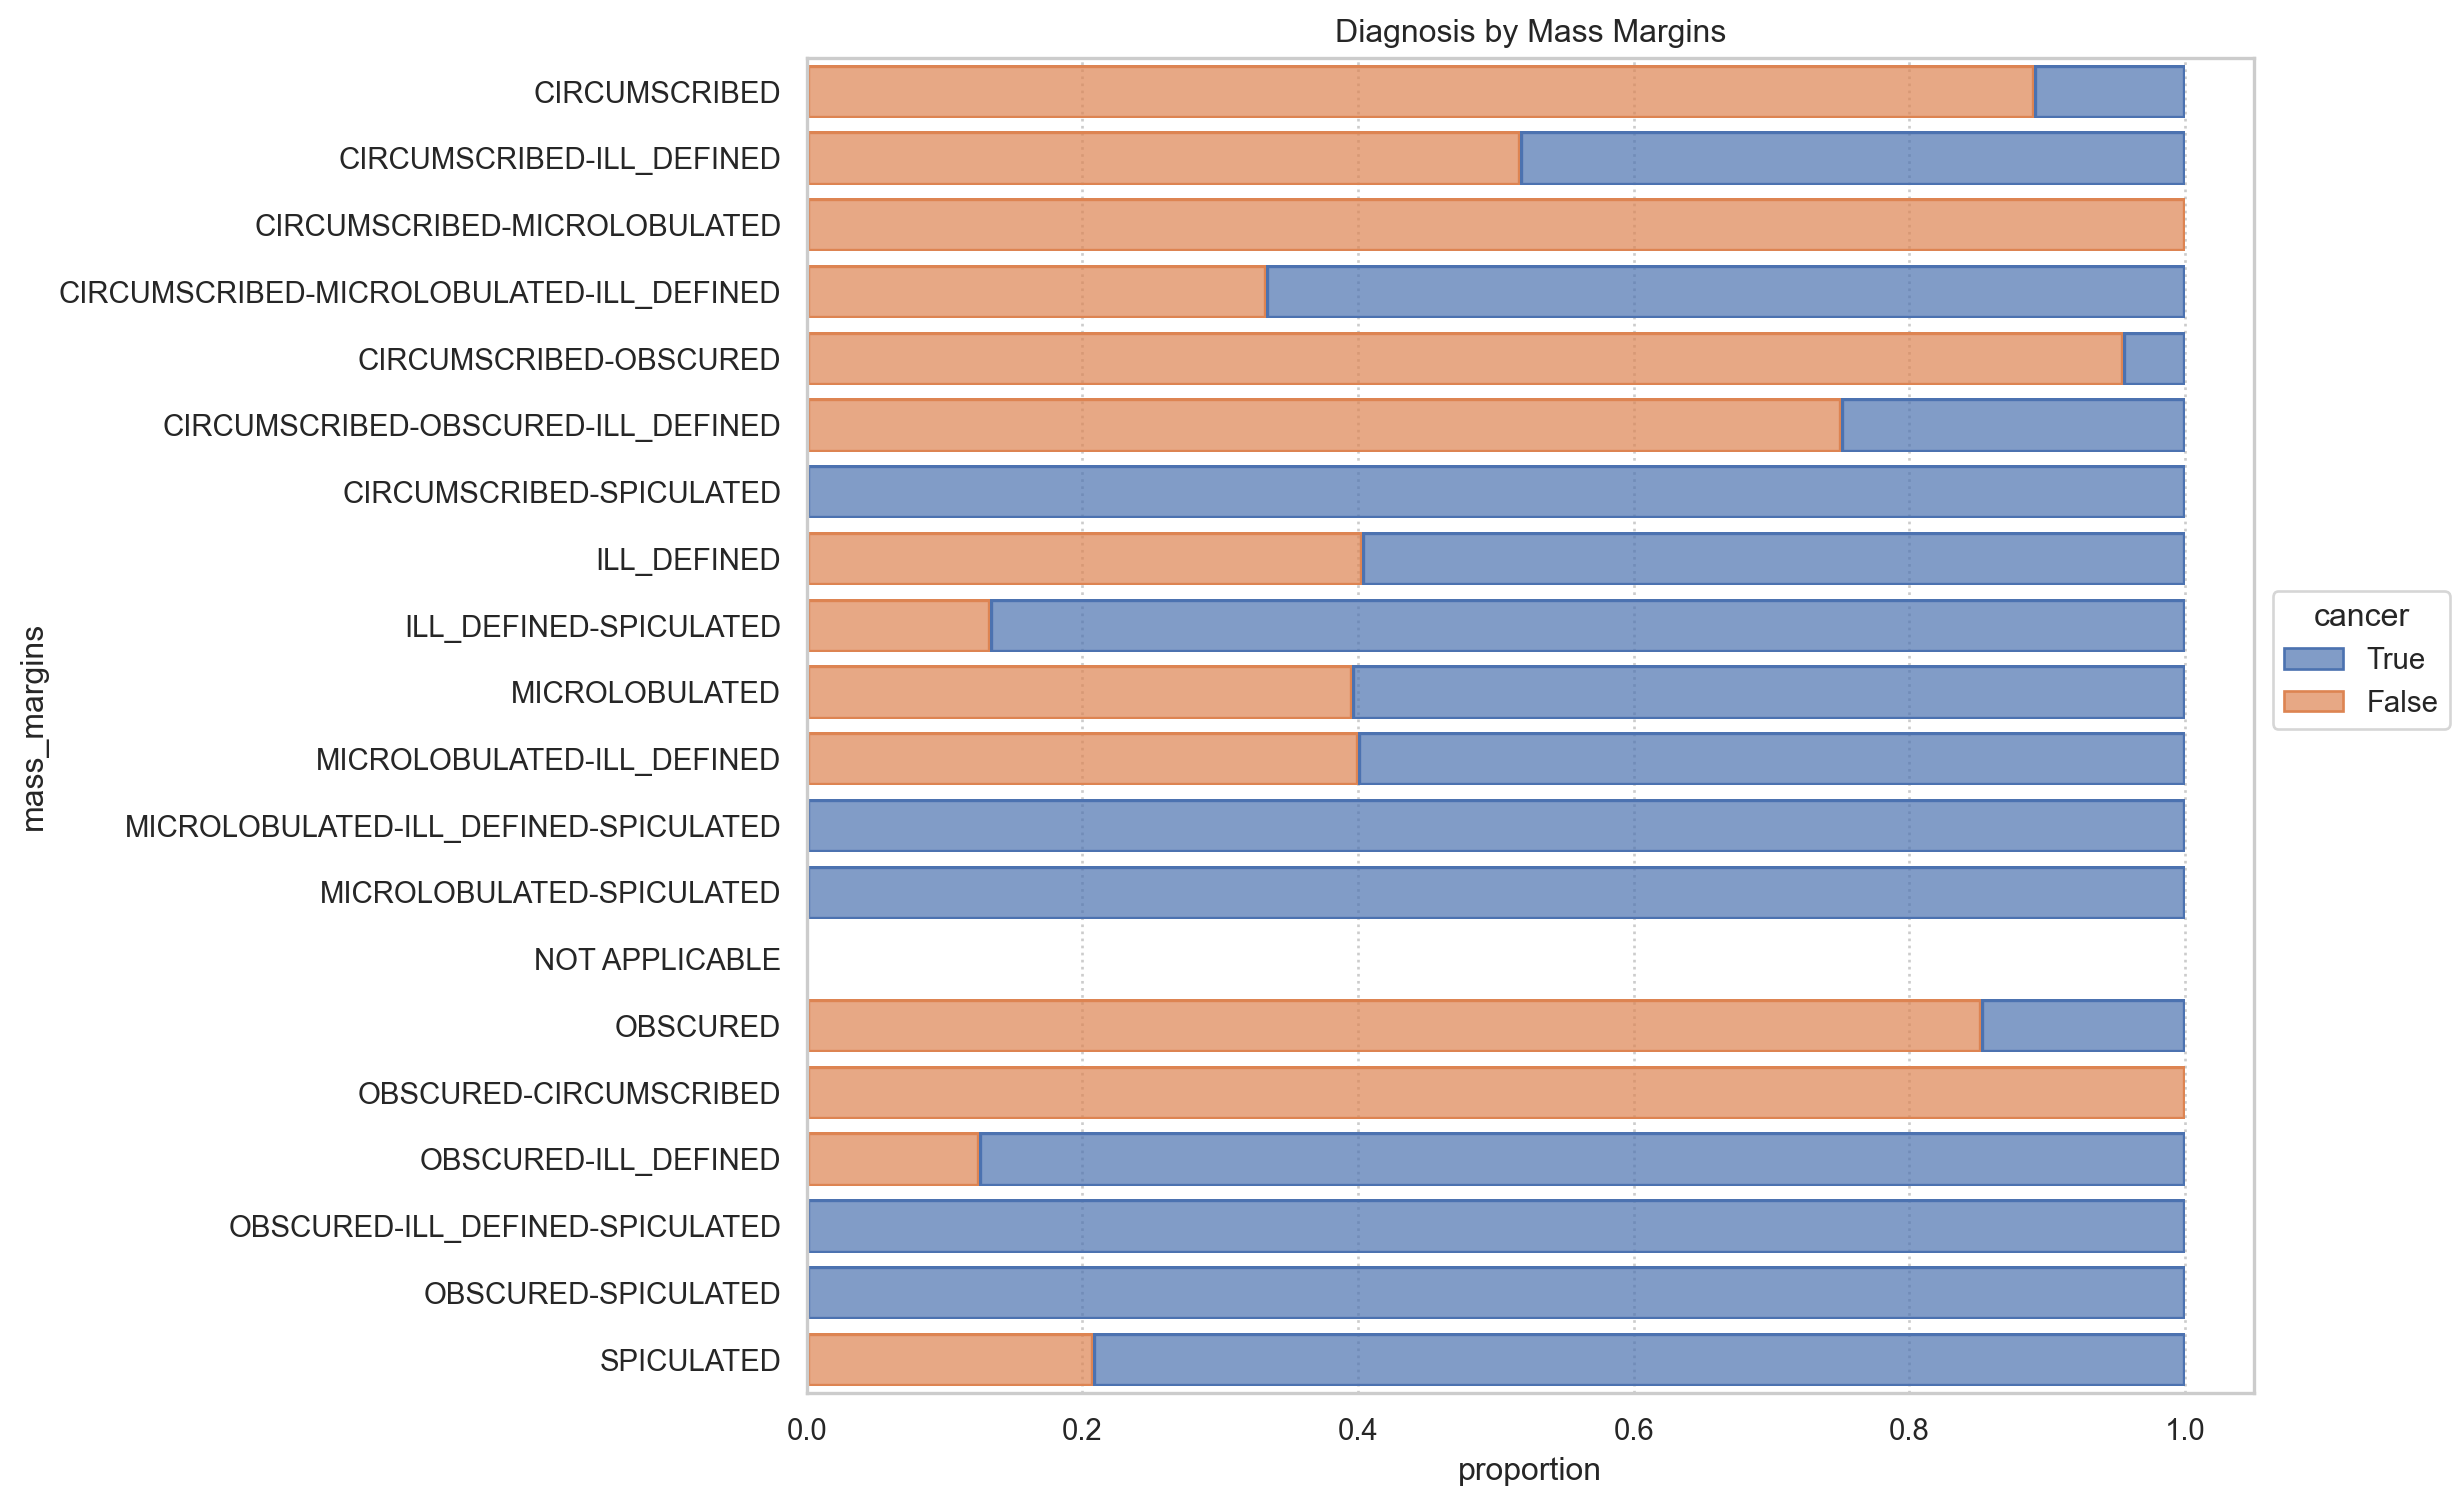

In [51]:
prop = df_mass[['mass_margins', 'cancer']].groupby(by=['mass_margins']).value_counts(normalize=True).to_frame().reset_index().sort_values(by=['mass_margins','cancer'])
sns.objects.Plot(prop, y='mass_margins', x='proportion', color='cancer').add(so.Bar(), so.Stack()).theme({**sns.axes_style("whitegrid"), "grid.linestyle": ":"}).label(title="Diagnosis by Mass Margins").layout(size=(12,8), engine='tight')

As expected, mass margins appear determinative. Which mass margins are most concerning?

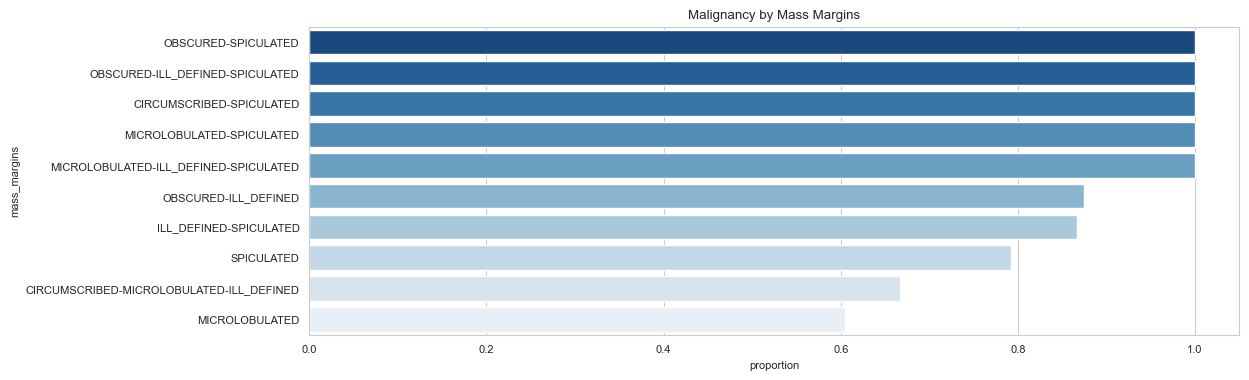

In [52]:
fig, ax = plt.subplots(figsize=(12,4))
mass_margins = cases.get_most_malignant_mass(x='mass_margins', n=10)
mass.plot.barplot(data=mass_margins, y='mass_margins', x='proportion', title='Malignancy by Mass Margins', ax=ax)

In [53]:
cv = mass.stats.cramersv(a='mass_margins', b='cancer')
print(cv)



                            CramersV                            
                            Name | Cramer's V
                           Value | 0.5894681913733985
                          Pvalue | 2.1871720584088994e-113
                           Alpha | 0.05
                        Strength | Large
                               A | mass_margins
                               B | cancer
                               N | 1694
                             Dof | 1
                         X2alpha | 0.05
                              X2 | 588.6188361978973
                           X2dof | 18




This chi-square test of independence between mass margins and diagnosis indicates a large and significant association ($X^2$(1,n=1694)=588.62 p<0.01, $V$=0.59).

That concludes the target association section of the bivariate analysis. Let's examine the relationships among the features.

### Bivariate Feature Association Analysis
What does calcification type imply about calcification distribution? To what degree is mass shape and mass margin related? Are certain morphologies more or less subtle? In this section, we examine the strength of associations among the features in the CBIS-DDSM using Cramer's V effect size measurement. For this exercise, we'll interpret the Cramer's V effect sizes as follows:

|      V      |   Effect   |
|:-----------:|:----------:|
|    ≥ 0.5    |    Large   |
| ≥ 0.3 < 0.5 |  Moderate  |
| ≥ 0.1 < 0.3 |    Small   |
|   0 < 0.1   | Negligible |

We'll start with the full dataset, to investigate the relationships between non-morphological features. Then, we'll analyze mass and calcification cases separately to avoid in spurious associations across abnormality types.

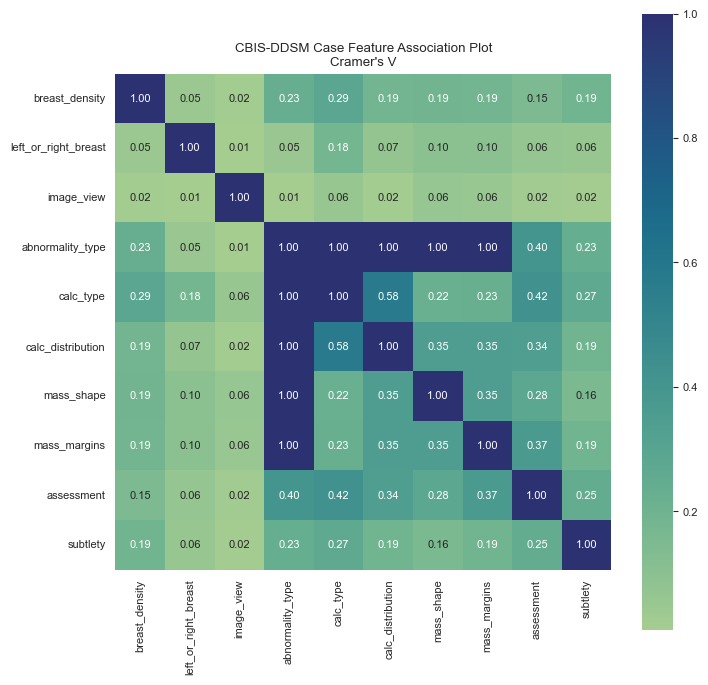

In [54]:
fig, ax = plt.subplots(figsize=(8,8))
cases.plot_feature_associations(ax=ax)

We'll ignore abnormality type and the morphology associationss for now. Calcification and mass morphology associations will be analyzed separately. That said, several observations can be made:
1. Abnormality type has a moderate association with BI-RADS assessment. 
2. There appears to be weak associations among the non-morphological features.

Let's take a look breast density vis-a-vis abnormality type.

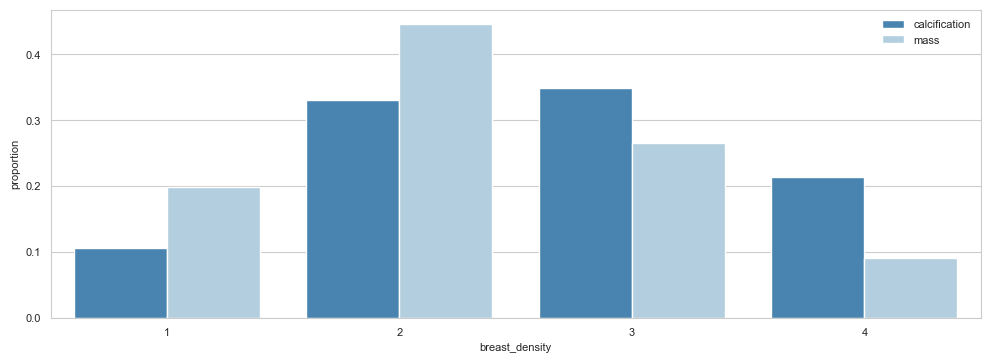

In [55]:
fig, ax = plt.subplots(figsize=(12,4))
df = cases.as_df()
df_props = df[['abnormality_type', 'breast_density']].groupby(by=['abnormality_type']).value_counts(normalize=True, sort=False).to_frame().reset_index()
cases.plot.barplot(data=df_props, x='breast_density', y='proportion', hue='abnormality_type', ax=ax)

Abnormality types tends to behave similarly across breast density categories, thus the weak association.

#### Calcification Feature Bivariate Analysis

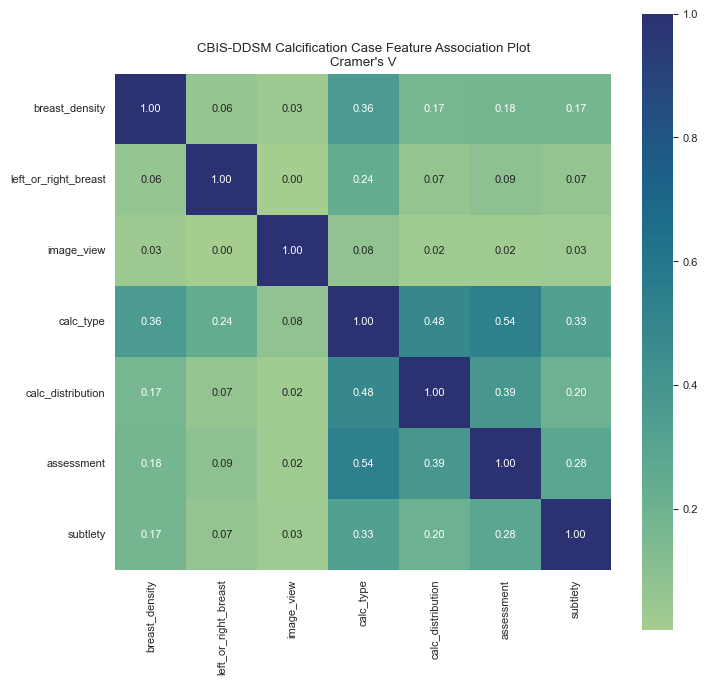

In [56]:

fig, ax = plt.subplots(figsize=(8,8))
calc.plot_calc_feature_associations(ax=ax)

##### Calcification Variables with Large Effect
Calcification type and assessment appear to be strongly associated. Let's take a closer look.

###### Calcification Type and Assessment

In [57]:
cv = calc.stats.cramersv(a='calc_type', b='assessment')
print(cv)



                            CramersV                            
                            Name | Cramer's V
                           Value | 0.5399745903685791
                          Pvalue | 0.0
                           Alpha | 0.05
                        Strength | Large
                               A | calc_type
                               B | assessment
                               N | 1872
                             Dof | 4
                         X2alpha | 0.05
                              X2 | 2183.2953161289365
                           X2dof | 168




Indeed, the result is signficant ($X^2$(4,n=1694)=2183.62 p<0.01, $V$=0.54).

In the prior section, we separated compound calcification types into separate categories; thereby, reducing the number of calcification types from 40 to 13. Let's examine the relationship between these calcification types and assessment. 

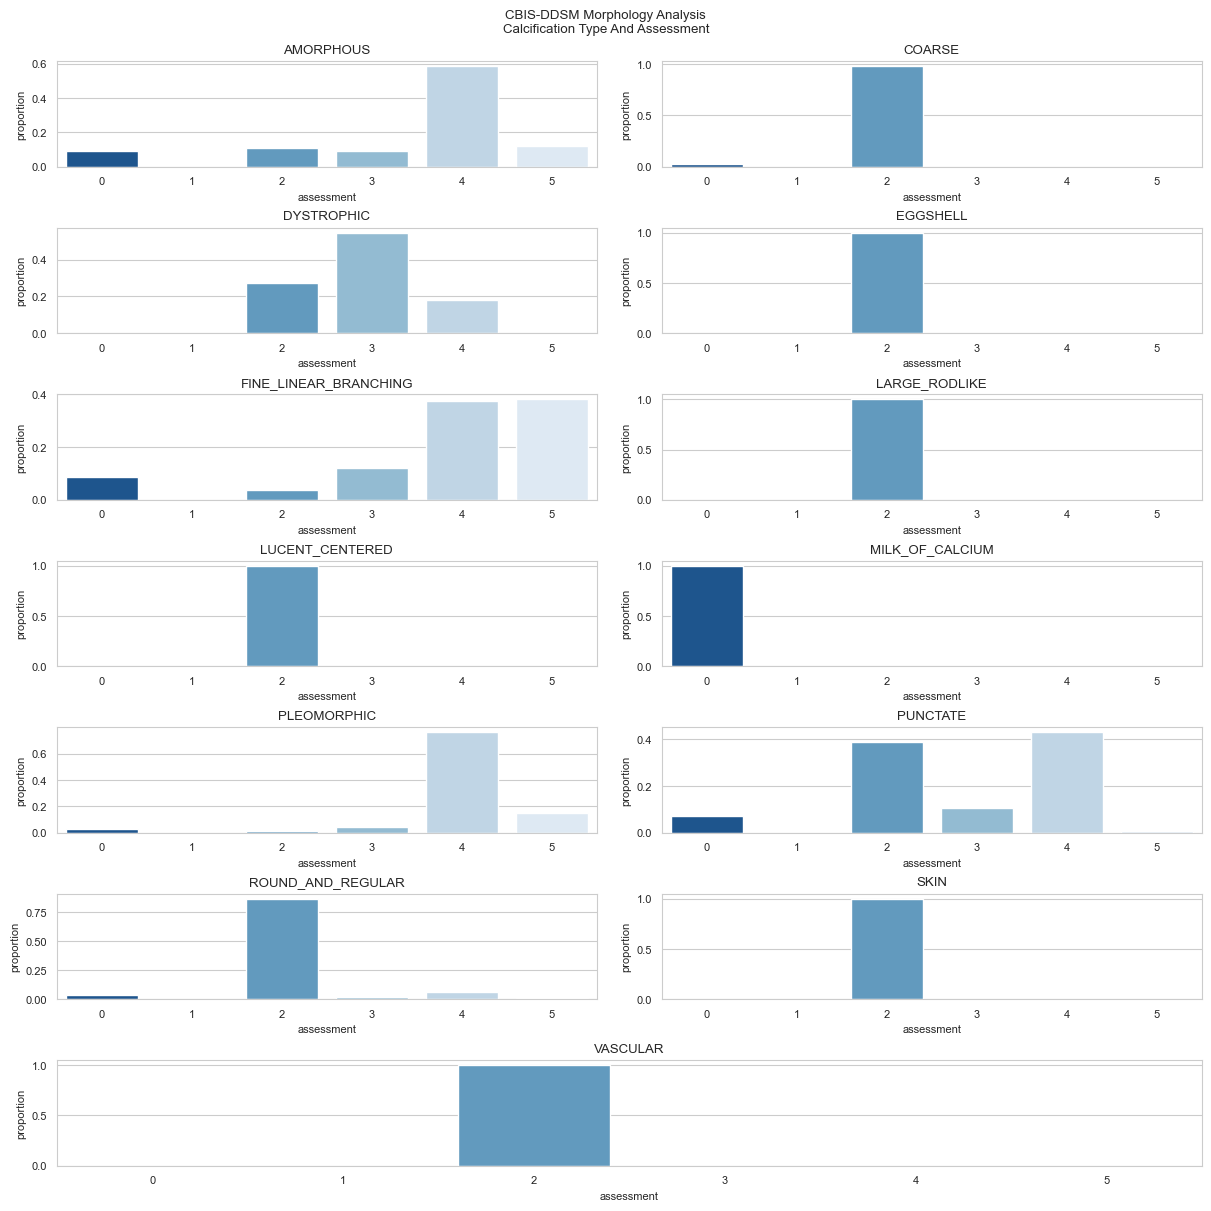

In [58]:
_ = cases.summarize_morphology_by_feature(morphology='calc_type', by='assessment', figsize=(12,12))

Above, we show the proportion of BI-RADS assessments for each calcification type. Pleomorphic, fine linear branching and amorphous calcifications appear to render the highest levels of suspicion with BI-RADS 4 and 5 assessments. Those of intermediate concern are dystrophic and punctate. The remaining are associated with generally benign classifications.

##### Calcification Variables with Moderate Effect
Moderate associations appear to be extant between:
- calcification type and calcification distribution
- calcification type and subtlety
- calcification distribution and assessment
- calcification type and breast density

Let's take a look.

**Calcification Type and Calcification Distribution**

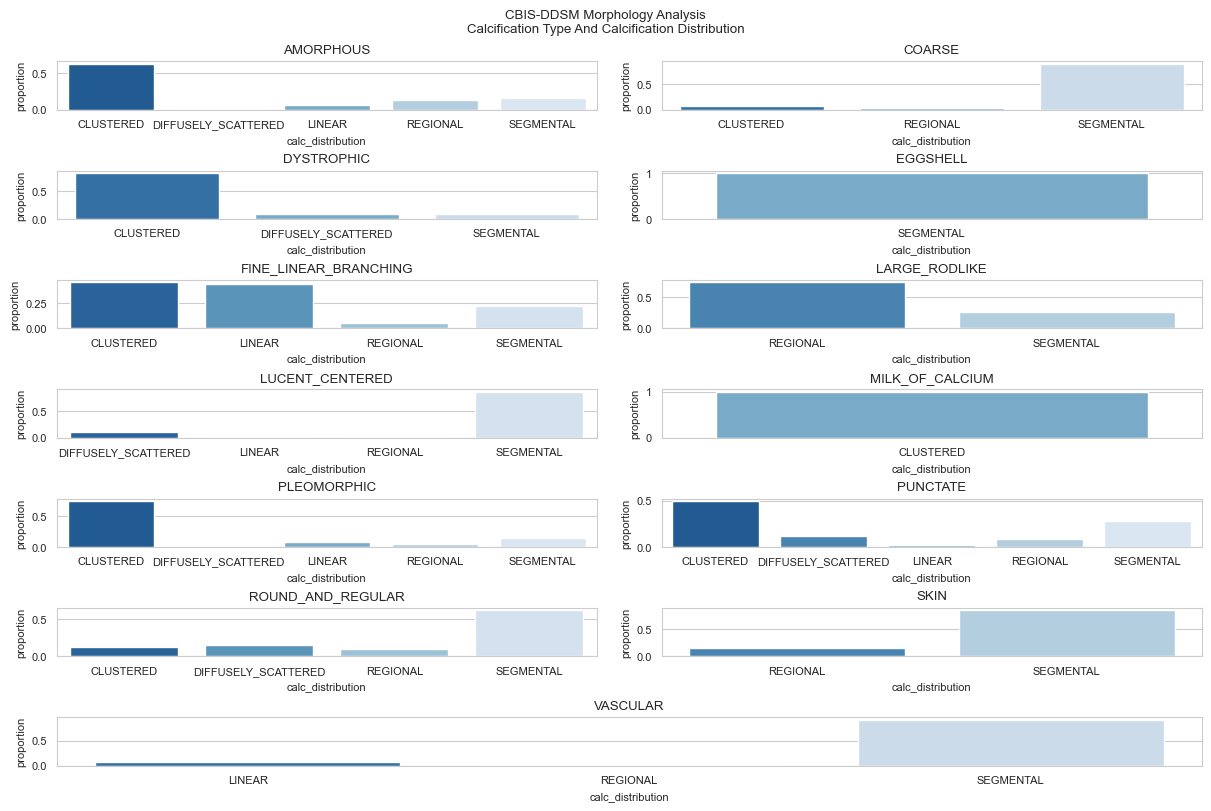

In [59]:
_ = cases.compare_morphology(m1='calc_type', m2='calc_distribution')

For each calcification type, we show the calcification distributions by proportion of calcification type cases in which they co-occur. For instance, amorphous types tend to co-occur with clustered distributions. Eggshell calcifications appear exclusively with segmental distributions in the CBIS-DDSM.  

Let's check calcification type and subtlety.

**Calcification Type and Subtlety**

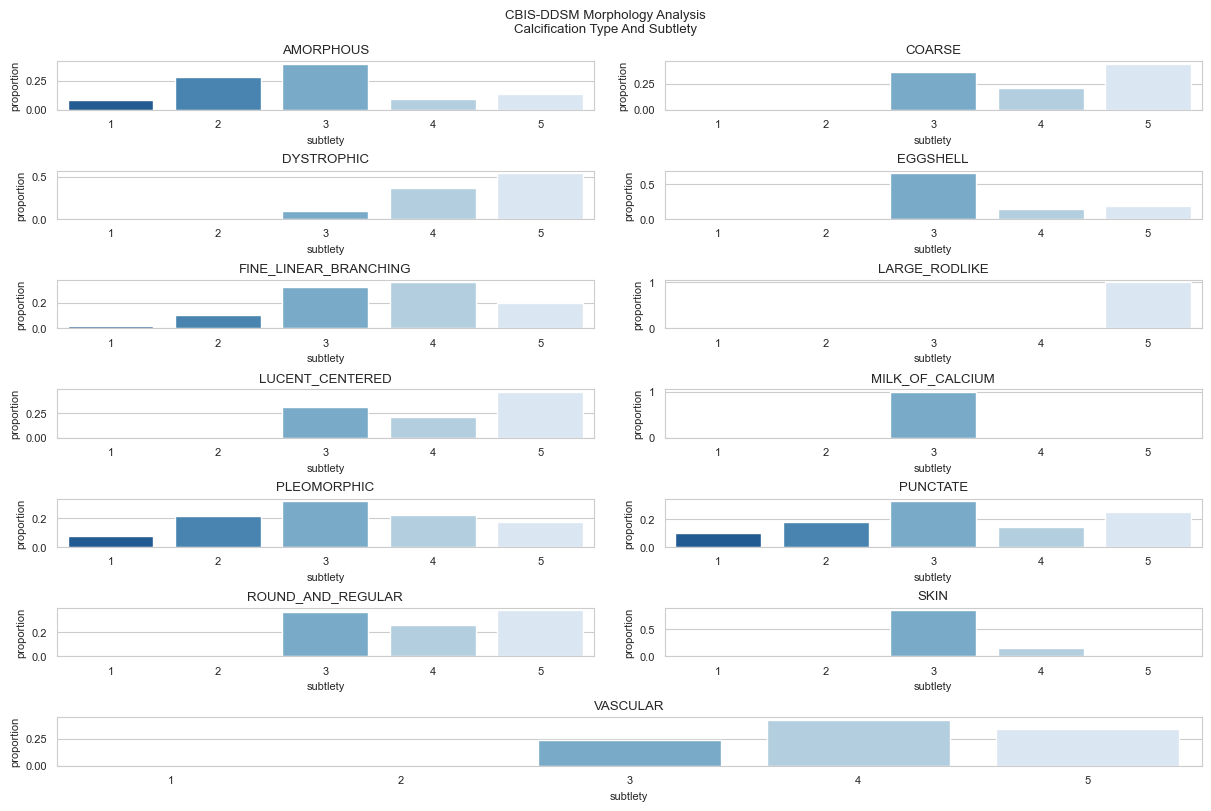

In [60]:
_ = cases.summarize_morphology_by_feature(morphology='calc_type', by='subtlety')

Here, we see that dystrophic, course, large_rodlike, lucent_centered, and round and regular calcifications present less conspicuously than the others.

Next, calcification distribution and BI-RADS assessment.

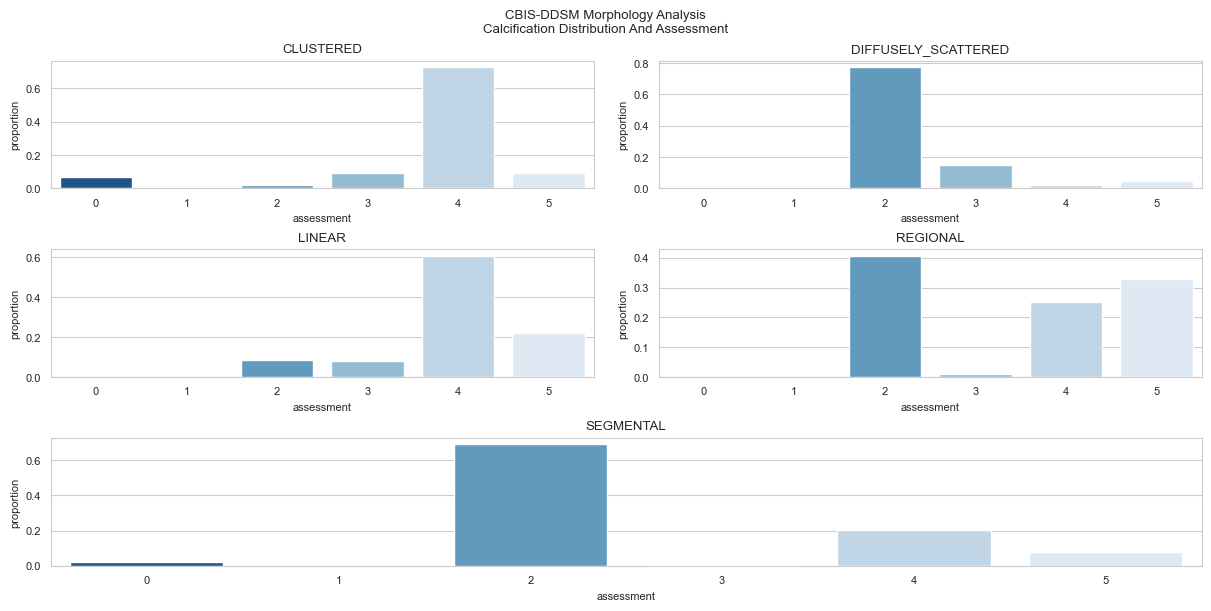

In [61]:
_ = cases.summarize_morphology_by_feature(morphology='calc_distribution', by='assessment', figsize=(12,6))

Clustered and linear calcification distributions tend to be suspicious with assessments in the BI-RADS 4 range. Regional distributions can indicate anything from benign to highly suspicious. Diffusely scattered and segmental distributions are primarily considered benign in the CBIS-DDSM.

Lastly, calcification type and breast density.

**Calcification Type and Breast Density**

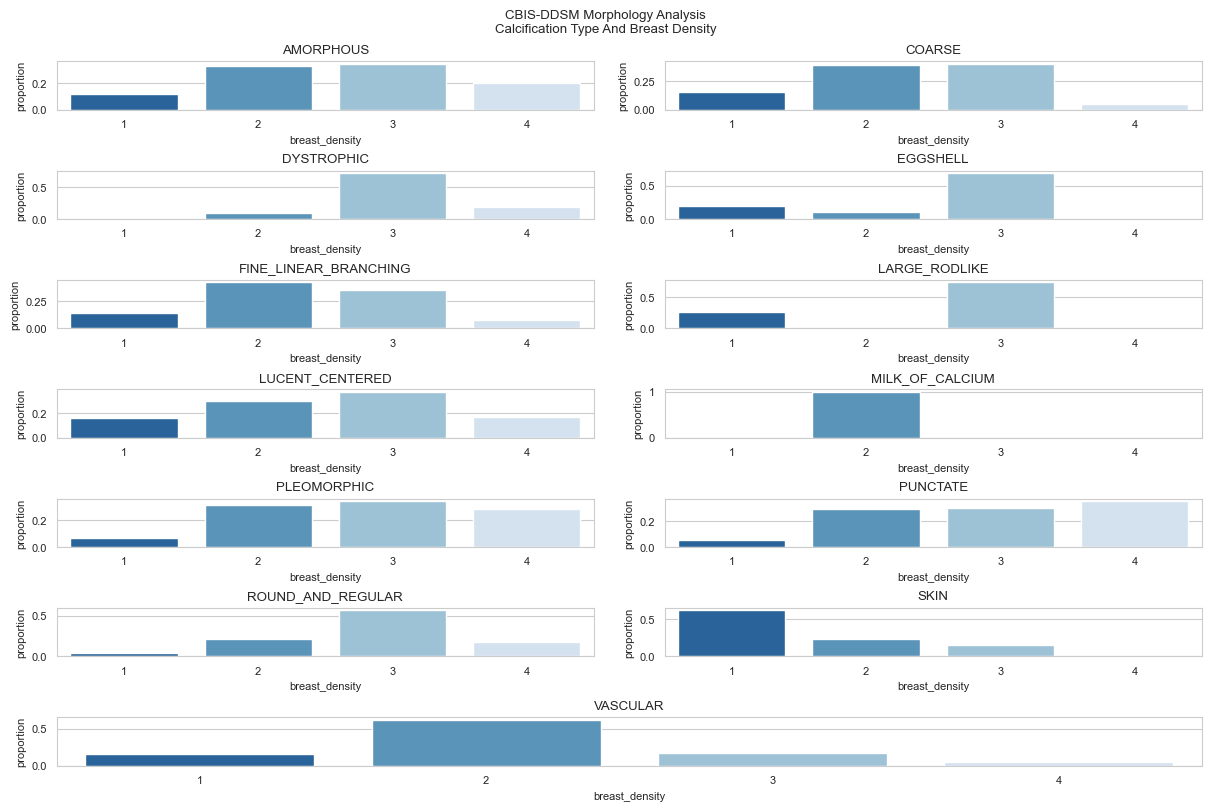

In [62]:
_ = cases.summarize_morphology_by_feature(morphology='calc_type', by='breast_density', figsize=(12,8))

Amorphous, course, fine linear branching, lucent centered, and pleomorphic almost follow a normal distribution. Some cases have fatty breasts, some extremely dense; but, most are in the middle categories 2 and 3. Eggshell, large rodlike, milk of calcium, skin, and vascular types stand out as co-occuring with breasts of specific densities.

#### Mass Feature Bivariate Analysis
Next, let's examine feature relationships for mass cases.

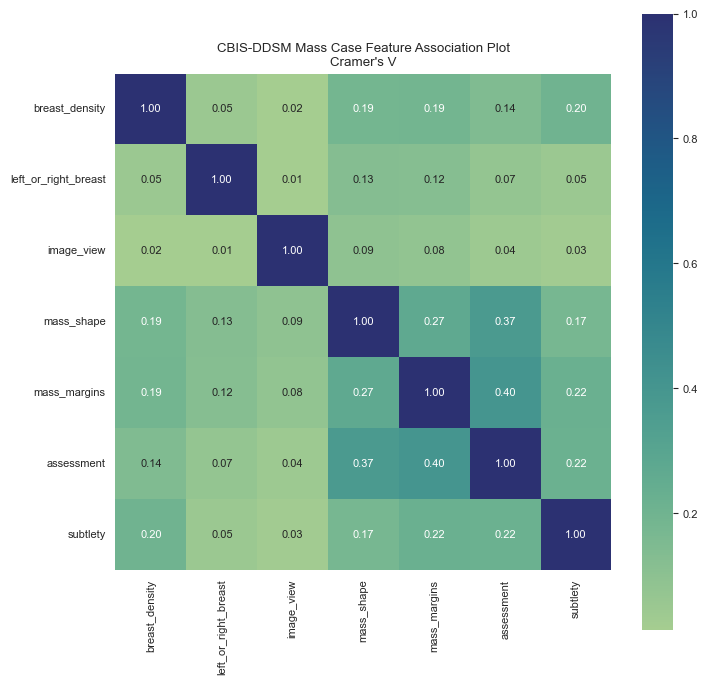

In [63]:

fig, ax = plt.subplots(figsize=(8,8))
mass.plot_mass_feature_associations(ax=ax)

No strong associations here, but we can identify a couple moderate associations.
- mass shape and assessment
- mass margins and assessment

It's notable that mass shape and mass margins are weakly associated.

**Mass Shape and Assessment**

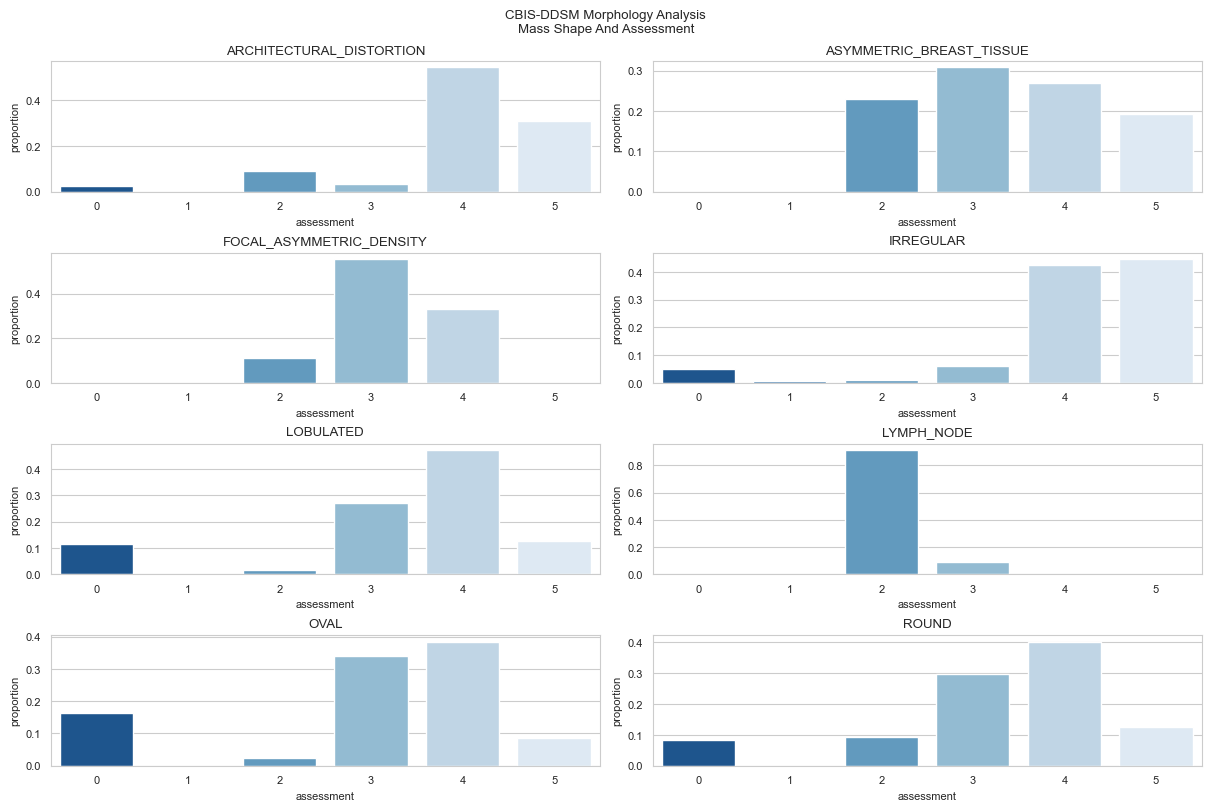

In [64]:
_ = cases.summarize_morphology_by_feature(morphology='mass_shape', by='assessment', figsize=(12,8))

Architectural distortion, irregular, oval, and round shapes tend to render the most concern. 

Next, mass margins and assessment.

**Mass Margins and Assessment**

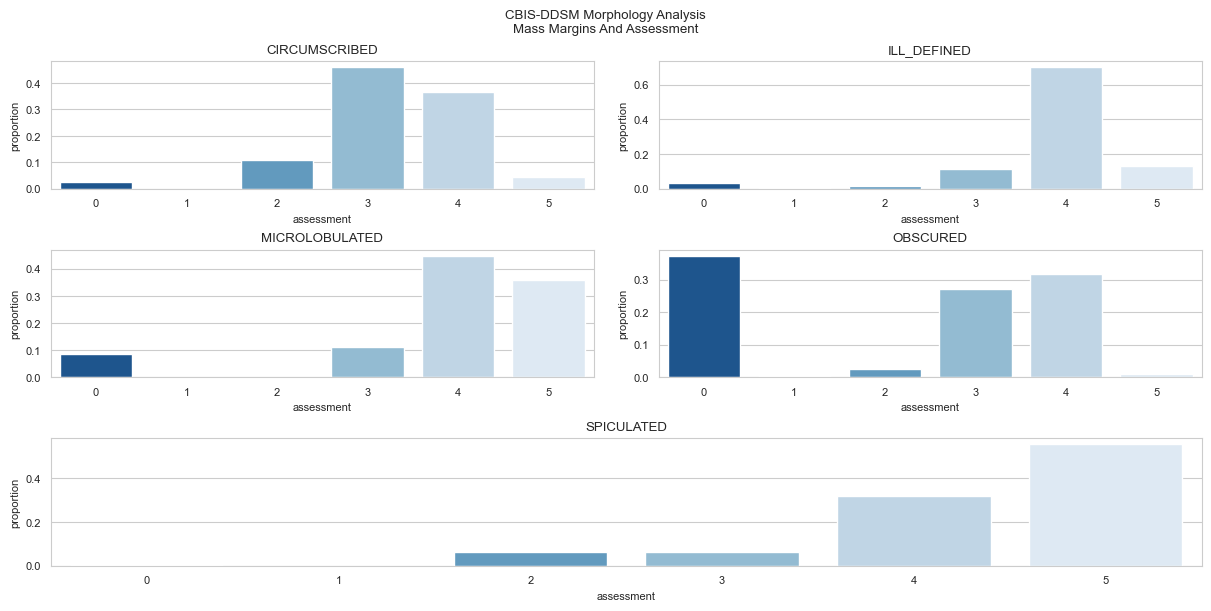

In [65]:
_ = cases.summarize_morphology_by_feature(morphology='mass_margins', by='assessment', figsize=(12,6))

Spiculated, ill-defined, and microlobulated masses appear to be of greater concern than obscured, and perhaps circumscribed mass margins.

### Summary CBIS-DDSM Bivariate Analysis
This concludes the bivariate component of this exploratory data analysis. Let's summarize our observations thus far.

Our bivariate analysis was conducted in two parts:
1. Bivariate Target Variable Association Analysis
2. Bivariate Feature Association Analysis

The former examined the relationships between the features and the target variable, 'cancer' and the latter explored the relationships between feature pairs.  

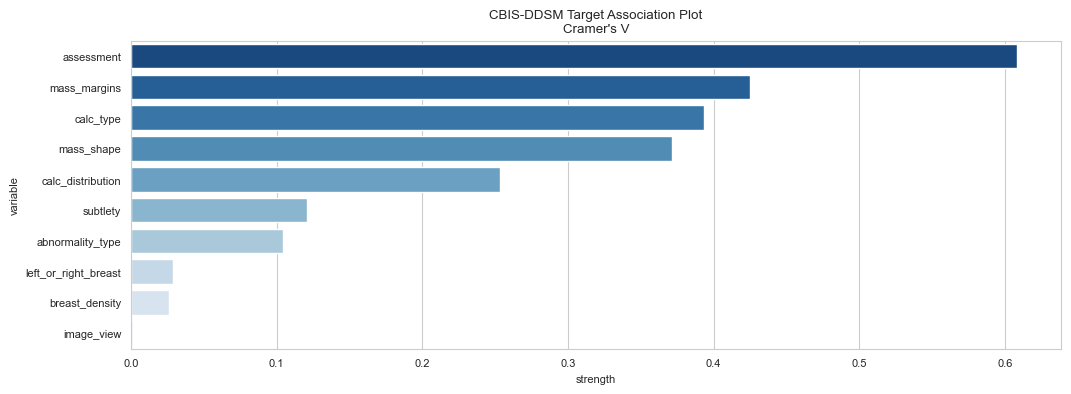

In [66]:
cases.plot_target_associations()

#### Bivariate Target Association Analysis Summary
The plot above depicts the Cramer's V associations between the independent variables and our target variable, 'cancer'. The main observations are as follows:
1. There was strong agreement between the BI-RADS assessments and the pathology ($\tau$=0.60, p<0.01); an expected finding as many of the BI-RADS assessments were likely updated as additional information was gathered by the physician {cite}`leeCuratedMammographyData2017`.
2. Mass margins had the strongest association with pathology ($X^2$(1,n=1694)=588.62 p<0.01, $V$=0.59). Of the 19 categories, the margins most associated with malignancy were:
   1. Obscured-Spiculated,
   2. Obscured-Ill-Defined,
   3. Circumscribed-Spiculated,
   4. Microlobulated-Spiculated, and
   5. Microlobulated-Ill-Defined-Spiculated
   Indeed, 100% of the above cases were malignant. 
3. Calcification type was also strongly associated with pathology ($X^2$(1,n=1872)=539.69 p<0.01, $V$=0.54). Punctate fine linear branching, punctate amorphous pleomorphic, and amorphous round and regular had malignancy rates of 100% in the dataset. Pleomorphic fine linear branching, fine linear branching, amorphous pleomorphic, and pleomorphic all had malignancy rates exceeding 50%.  
4. Mass shape had a large and significant effect on pathology in the dataset ($X^2$(1,n=1694)=440.92 p<0.01, $V$=0.51). Lobulated, round irregular, and irregular architectural distortion were associated with malignancy rates exceeding 80%. 
5. Calcification distribution had a moderate effect on pathology.  ($X^2$(1,n=1872)=198.56 p<0.01, $V$=0.33). Linear segmental, clustered linear, and linear calcification distributions were associated with malignancy rates above 50%.
6. Subtlety, abnormality type, breast, breast density, and image view were all weakly associated with pathology.


#### Bivariate Feature Association Analysis Summary
Cramer's V was used to measure the degree of association between the features. We observed several strong associations in both calcification and mass cases:
1. Calcification Cases: 
   1. There was a strong association (V=0.54) between calcification type and BI-RADS assessment. 
   2. Moderate associations were observed between:
      1. breast density and calcification type
      2. calcification type and distribution
      3. calcification type and subtlety
      4. calcification distribution and BI-RADS assessment
   3. The other features were weakly associated. 
2. Mass Cases:
   1. No strong associations were observed among the features in the mass dataset.
   2. Moderate associations were observed between:
      1. mass shape and BI-RADS assessment
      2. mass margins and BI-RADS assessment
   3. Other features were weakly associated.

Next, multivariate data analysis.

## Case Data Multivariate Analysis
The purpose of the multivariate analysis is to elucidate features of the data, beyond that which can be derived from the univariate, and bivariate analyses above. Our objectives; therefore, are to:
1. Identify the variables that most impact the diagnosis of cancer,
2. Estimate the importance of each independent variable in explaining the diagnosis.
3. Establish a model to predict a diagnosis, given the independent variables.
4. Cluster the cases into groups based on morphological and other features.

A series of classifiers will be trained on the calcification and mass training data. Then, we'll evaluate the performance of the trained models on the test sets. The best algorithm and model will then be applied to the entire dataset to arrive at an overall prediction and a set of weights for each variate, indicating its level of importance to the classification task. Next, a clustering analysis will group mass and calcification cases to maximize intra group similarity and inter-group dissimilarity. 

In [67]:
CALC_TRAIN_FP = os.path.abspath("data/cooked/calc_train.csv")
CALC_TEST_FP = os.path.abspath("data/cooked/calc_test.csv")
MASS_TRAIN_FP = os.path.abspath("data/cooked/mass_train.csv")
MASS_TEST_FP = os.path.abspath("data/cooked/mass_test.csv")

BEST_MODEL_FP = os.path.abspath('model/eda/best_gs_pipeline.pkl')
MODEL_FORCE = False

### Classification Analysis
The aim of the classification analysis is to identify the variates that most influence a diagnosis, evaluate their relative importance, and predict a diagnosis given the variates. For this task, three algorithms will be evaluated: Logistic Regression, Support Vector Machines, and Random Forests. Before moving on to the classification task, let's quickly review these classical machine learning algorithms.

#### Logistic Regression
Logistic regression is a discriminative classifier that learns to distinguish the classes (diagnose) by directly computing $P(y=1|X)$, the probability that the case is malignant, given a variate, a single multivariate relationship with regression-like coefficients indicating the relative impact of each predictor. It makes the central assumption that $P(y|X)$ can be approximated as a logit, or sigmoid function applied to a linear combination of the input features. Concretely, Logistic Regression assumes the following for a single training instance.

```{math}
:label: assumption
P(y=1|X=x) = \sigma(z) where z = \theta_0 + \displaystyle_i=1^m \theta_ix_i
```
Where the sigmoid function is:

```{math}
:label: sigmoid
\sigma(z) = \frac{1}{1+e^{-z}}
```
Often, this assumption is also written as:

```{math}
:label: assumption2
P(y=1|X=x) = \sigma(\theta^Tx)
P(y=0|X=x) = 1-\sigma(\theta^Tx)
```

Logistic Regression selects values of the predictors, $\theta$ that maximize the likelihood of all data. We can express the log likelihood of all data as:
```{math}
:label: likelihood
LL(\theta) = \displaystyle_{i=0}^n y^{(i)} log\sigma(\theta^Tx^{x{(i)}}) + (1-y^{(i)})log[1-\sigma(\theta^Tx^{(i)})]
```
Now that we have a function for the log-likelihood, we simply need to choose the values of theta that maximize it. Unlike linear regression, there is no closed-form way of calculating theta. Rather, we chose theta using an iterative optimization algorithm, such as gradient descent. 

#### Support Vector Classifier

#### Calcification Cases

Let's load the calcification training and test sets.

In [68]:
train = pd.read_csv(CALC_TRAIN_FP)
X_train = train.loc[:,train.columns != 'cancer']
y_train = train['cancer']

test = pd.read_csv(CALC_TEST_FP)
X_test= test.loc[:, test.columns != 'cancer']
y_test = test['cancer']
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

Next, we'll construct some pipelines.

In [69]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(random_state=5))])
pipe_svm = Pipeline([('scaler', StandardScaler()), ('clf', SVC(random_state=5))])
pipe_rf = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier(random_state=5))])

Now, we set the grid search hyperparameters.

In [70]:
param_lr_c = [1.0, 0.5, 0.1]
param_range = [1,2,3,4,5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		           'clf__C': param_lr_c,
		           'clf__solver': ['liblinear']}] 

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		            'clf__C': param_range}]

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		          'clf__min_samples_leaf': param_range,
		          'clf__max_depth': param_range,
		          'clf__min_samples_split': param_range[1:]}]                    

Now, we construct our GridSearchCV objects.

In [71]:
jobs = 6
gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10) 
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)
gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

Let's build a list of GridSearchCV objects for iteration.

In [72]:
grids = [gs_lr, gs_rf, gs_svm]
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 2: 'Support Vector Machine'}

Finally, let's fit the GridSearchCV objects.

In [73]:
if not os.path.exists(BEST_MODEL_FP) or MODEL_FORCE:
    print('Performing model optimizations...')
    best_acc = 0.0
    best_clf = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])	
        # Fit grid search	
        gs.fit(X_train, y_train)
        # Best params
        print('Best params: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best training accuracy: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred = gs.predict(X_test)
        # Test data accuracy of model with best params
        print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
        # Track best (highest test accuracy) model
        if accuracy_score(y_test, y_pred) > best_acc:
            best_acc = accuracy_score(y_test, y_pred)
            best_gs = gs
            best_clf = idx
    print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])
    
    # Save best grid search pipeline to file
    os.makedirs(os.path.dirname(BEST_MODEL_FP), exist_ok=True)
    with open(BEST_MODEL_FP, 'wb') as pickle_file:
        pickle.dump(best_gs, pickle_file)
    print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], BEST_MODEL_FP))


Now, let's use the best model to predict on the entire dataset.

In [74]:
with open(BEST_MODEL_FP, 'rb') as pickle_file:
    best_gs = pickle.load(pickle_file)
clf = best_gs
y_pred = clf.predict(X)
print(accuracy_score(y_true=y, y_pred=y_pred))
print(classification_report(y_true=y, y_pred=y_pred))

0.7216880341880342
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1199
           1       0.58      0.79      0.67       673

    accuracy                           0.72      1872
   macro avg       0.72      0.74      0.72      1872
weighted avg       0.76      0.72      0.73      1872



The coefficients of the model indicate the importance of the feature to the prediction task. A positive value provides evidence that the instance being classified belongs to the positive or malignant class; whereas, a negative value provides evidence that the instance being classified belongs to the negative or benign class. Let's take a look.  

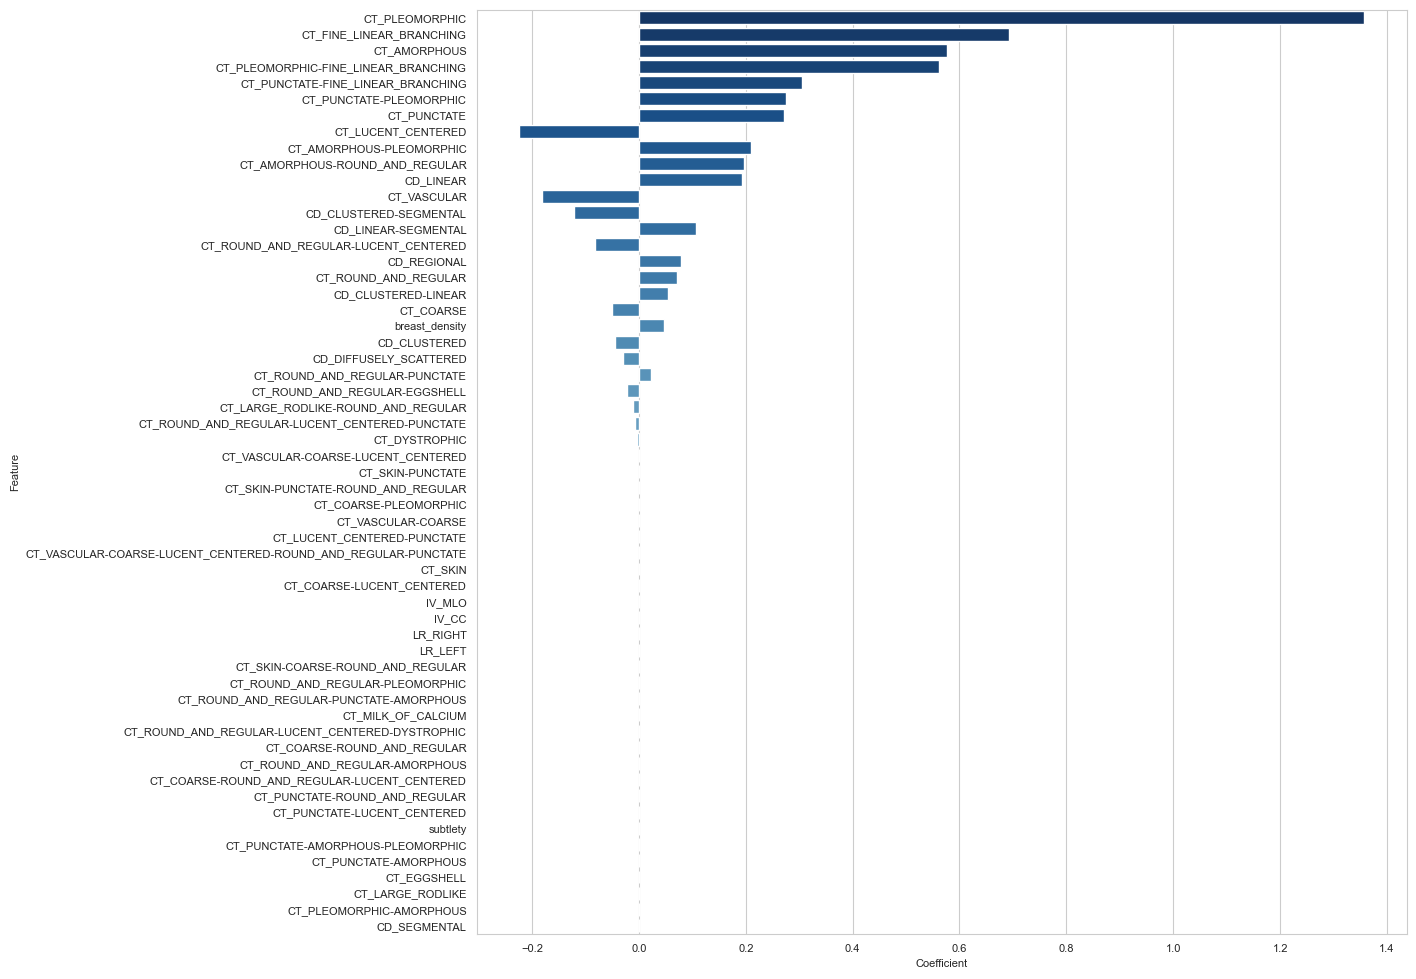

In [75]:
# Get the best estimator
clf = best_gs.best_estimator_.named_steps['clf']
# Create a dataframe containing the coefficients from the model.
calc_imp = pd.DataFrame(data=clf.coef_, columns=X.columns).T.reset_index()
calc_imp.columns = ['Feature','Coefficient']
# Sort by the absolute value of the coefficient.
calc_imp['abs'] = np.abs(calc_imp['Coefficient'])
calc_imp.sort_values(by='abs', ascending=False, inplace=True)
# Plot the coefficients.
fig, ax = plt.subplots(figsize=(12,12))
cases.plot.barplot(data=calc_imp, y='Feature', x='Coefficient', ax=ax)